# Data Cleaning, EDA, and Modeling - King County Housing

This notebook will outline an **_iterative_** approach to creating a sales price prediction model based on the King County Housing data set.  For our business case, a luxury real estate company serving sellers and buyers in the high income earning areas of King County, Washington would like to understand which housing features translate to higher housing prices in these areas, as well as develop a model to predict price based on housing features.
___

In [1]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
import requests
import time
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('seaborn-darkgrid')

## Import and Examine Data
___

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df.info() # Here is our base dataframe.  
# It consists of 21597 housing sales entries and 21 columns of data.  Date and sqft_basement are objects.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


>Investigating the data we can see high standard deviations for the square foot living space, square foot lot.  Mean price is \$540,296 with a std deviation of \$367,368 and a max value of \$7.7 million.

In [5]:
df.drop_duplicates() #checking for duplicates, none found

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
col_list = list(df.columns) # Investigating placeholder and NaN values
for col in col_list:
    print(df[col].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
7/27/2014      1
5/17/2014      1
3/8/2015       1
8/30/2014      1
5/24/2015      1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.

> We have seen that sqft_basement has a place holder value of '?'.  There are 454 entries with this value.  Rather than estimating or replacing these values, we are choosing to drop these entries.  We then cast this column as float instead of object so that we can use the numerical values.

In [7]:
df[df['sqft_basement']=='?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [8]:
df = df[df["sqft_basement"] != '?']

In [9]:
df["sqft_basement"] = df["sqft_basement"].astype(float)

> Date is also stored as a string/object. Since we feel that the date the house was sold may have an impact on the sales price, we are converting it to a datetime object and then converting to an ordinal so we can use it in our model.

In [10]:
df["date"] = df["date"].map(lambda date: datetime.strptime(date, '%m/%d/%Y'))

In [11]:
df['date']=df['date'].map(datetime.toordinal)

> Waterfront has a significant number of NaN values.  Since we cannot know for certain if the house is on the waterfront, we are casting this variable as a string.  It will then have values of '0.0', '1.0', or 'NaN' and we will encode these as categories in our model.

In [12]:
df['waterfront']

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    NaN
21596    0.0
Name: waterfront, Length: 21143, dtype: float64

In [13]:
df["waterfront"] = df["waterfront"].astype(str)

> The view variable is described as "Has been viewed".  We interpret this to mean that the listing has been viewed in the realtor multiple listing service (MLS) and do not believe that it is relevant to our model.

In [14]:
df.drop(columns = "view", inplace = True)

### Investigating distribution of variables

___

Now that the data has been cleaned we will look at plots of the data to look for linear relationships, normal distributions, and skew caused by outliers.

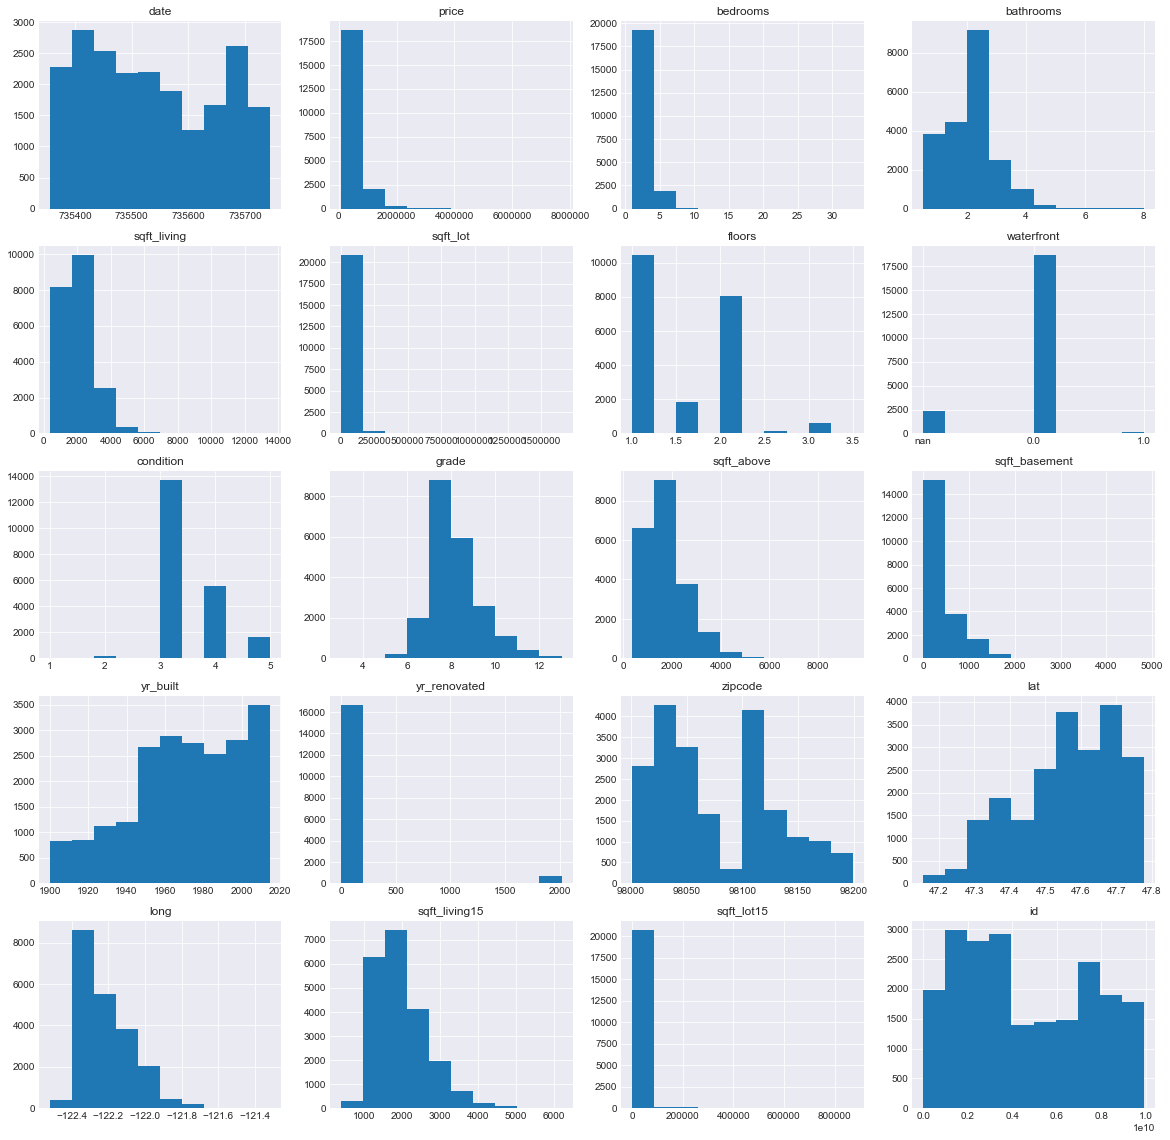

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
x = df.price
for n in range(len(df.columns)):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    y=df.iloc[:,n]
    ax.hist(y)
    ax.set_title(df.columns.values[n])
plt.show()   

> We can see in these histograms that many of the variables appear to be skewed by abnormally high outliers.  Some appear relatively normally distributed.  Several are obviously categorical.

> To investigate the outliers we will create box and whisker plots.

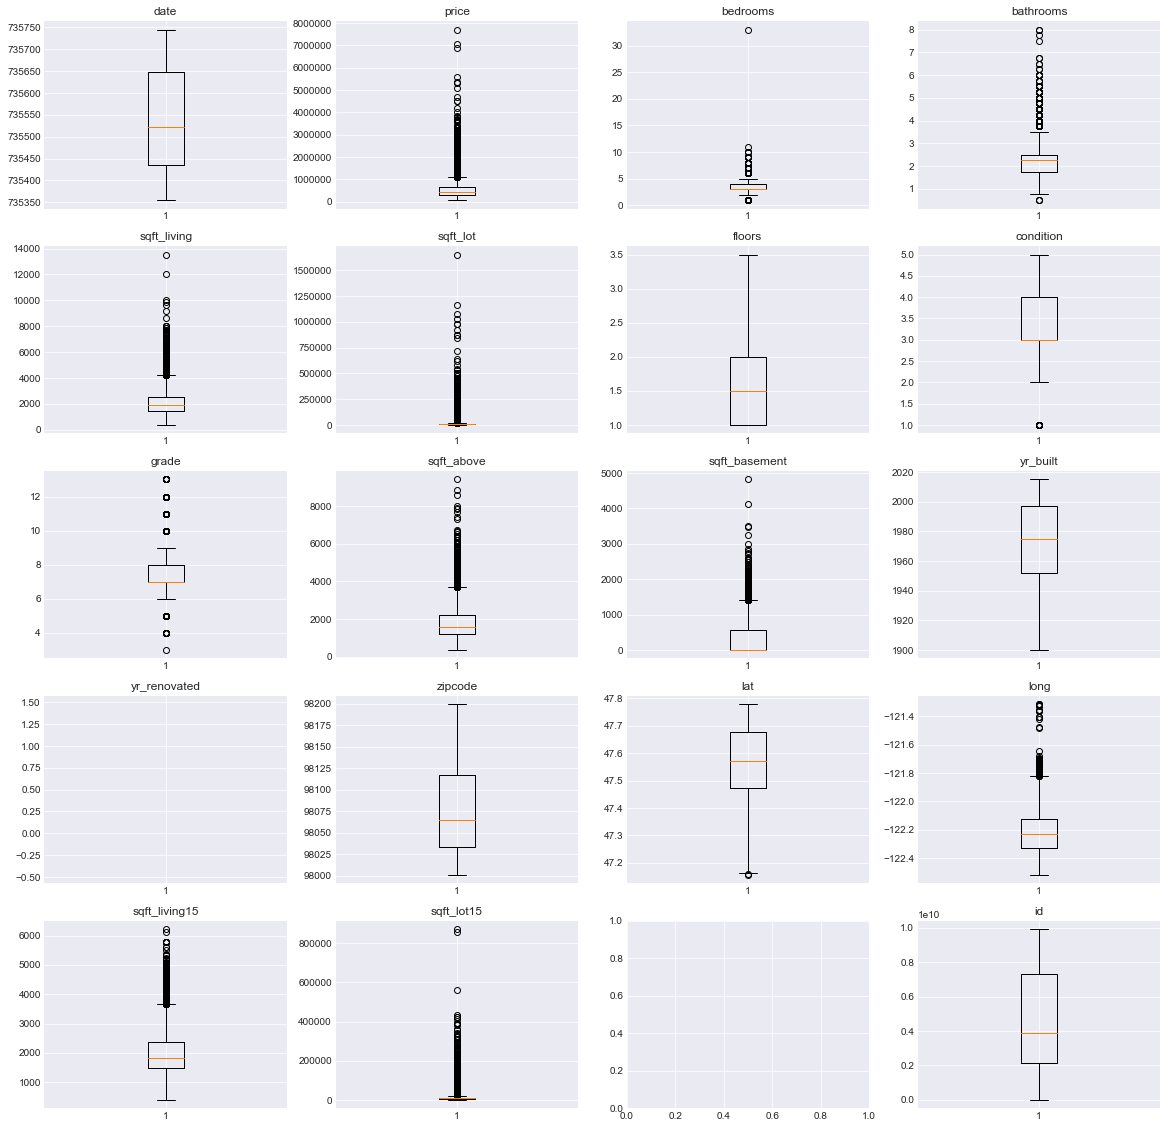

In [16]:
box_list = list(df.columns)
box_list.remove('waterfront')

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(box_list):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df[column]
    y=df.price
    ax.boxplot(x=x)
    ax.set_title(box_list[n])
plt.show()   

> Box plots show significant outliers in the data possibly due to very large, expensive houses in the dataset.

> Next we will create scatter plots to investigate independent variables relationship with price, our dependent variable.

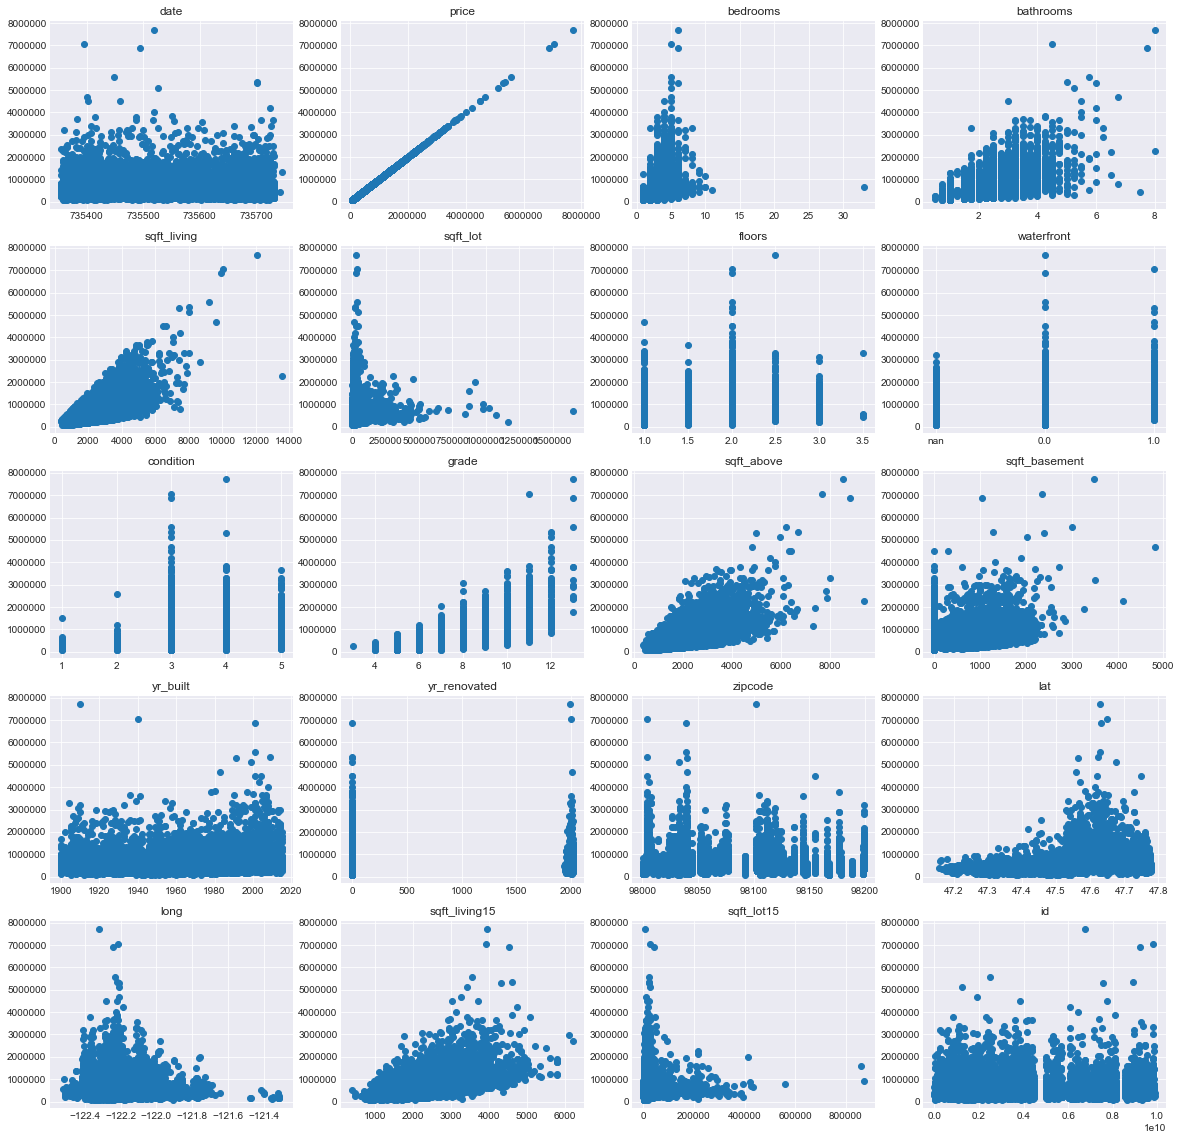

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(df.columns):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df[column]
    y=df.price
    ax.scatter(x, y)
    ax.set_title(df.columns.values[n])
plt.show()   

### Subsetting data for business case

We are modeling for a luxury real estate company targeting high income buyers. We want to know what features these buyers look for in houses that translate to higher listing prices.  

Here we are reading in the data we retrieved from data.census.gov, giving us the top 30 zip codes in the state of Washington based on the Average Adjusted Gross Income per Tax Return.

In [18]:
zips = pd.read_csv('data/top_30_zips.csv')
zips.head()

,ZIP,returns,AGI,AGIperReturn
0,98039,1540.0,1808237.0,1174.179870
1,98040,12650.0,4405904.0,348.292806
2,98004,18840.0,6309943.0,334.922665
3,98112,12660.0,4202173.0,331.925197
4,98164,110.0,33940.0,308.545455


In [19]:
fourteen_zips = list(zips.ZIP[:14]) # The dataframe has 70 zip codes.  We are choosing the top 14, or 20%.

In [20]:
df["zipcode"].value_counts()

98103    588
98038    574
98115    568
98052    562
98042    542
        ... 
98102    100
98010     98
98024     79
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

In [21]:
df_top_zip = df[df["zipcode"].isin(fourteen_zips)]

In [22]:
df_top_zip.shape # We now have 3192 entries in our dataframe, df_top_zip.

(3192, 20)

In [23]:
df_top_zip.zipcode.value_counts() 

98006    490
98074    433
98033    425
98053    397
98075    349
98004    315
98040    277
98112    261
98077    196
98039     49
Name: zipcode, dtype: int64

> Note that our dataframe only has 10 zipcode values because 4 of the top zips were not in King County or we had no sales data for those zipcodes.  

> We want to check the same data visualizations to examine the distributions of the subset

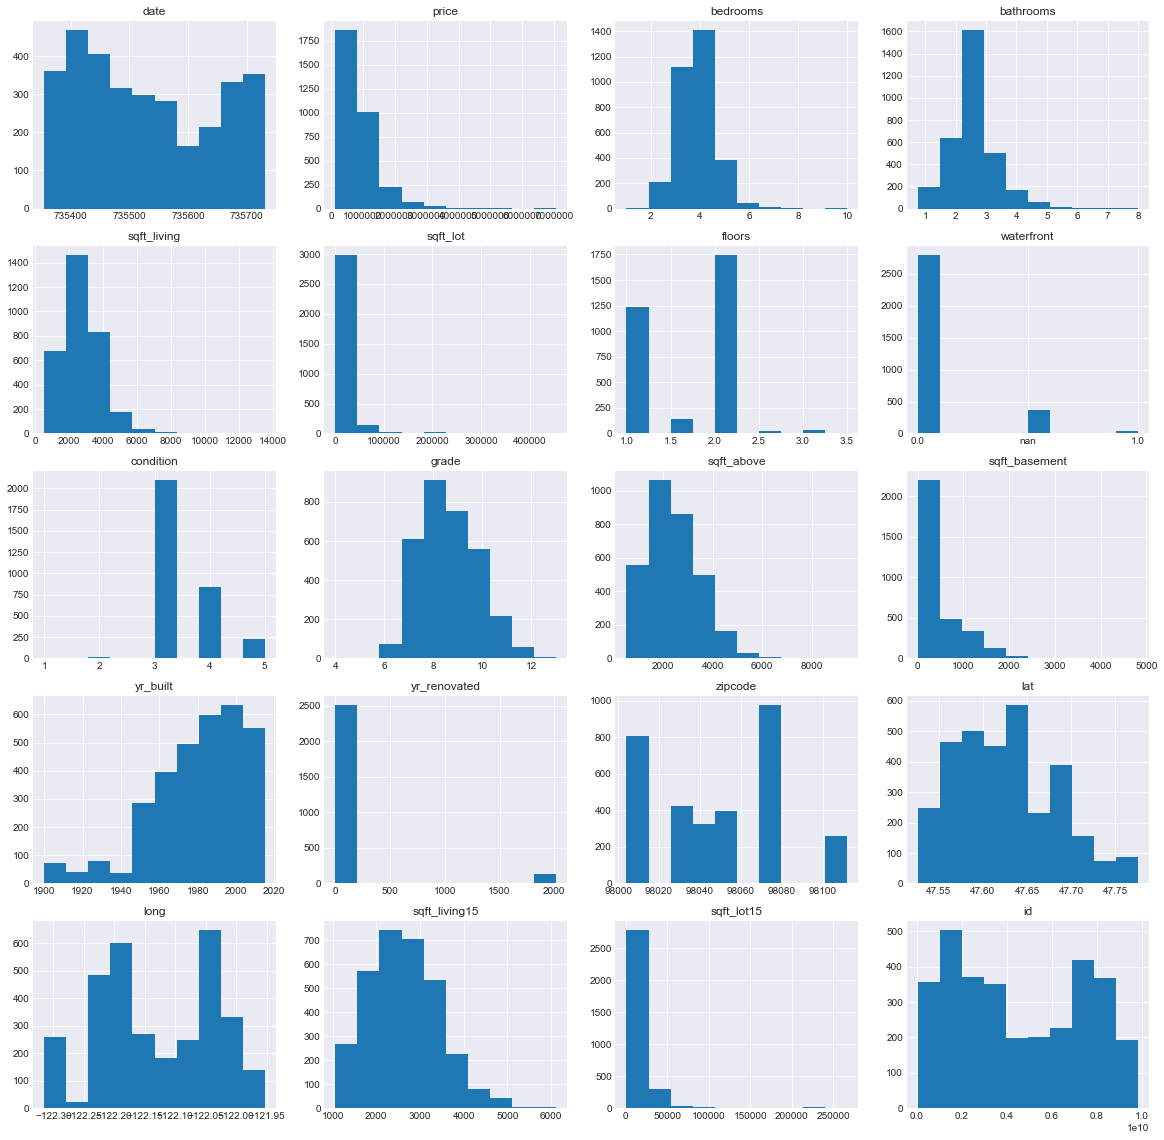

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
x = df_top_zip.price
for n in range(len(df_top_zip.columns)):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    y=df_top_zip.iloc[:,n]
    ax.hist(y)
    ax.set_title(df_top_zip.columns.values[n])
plt.show()   

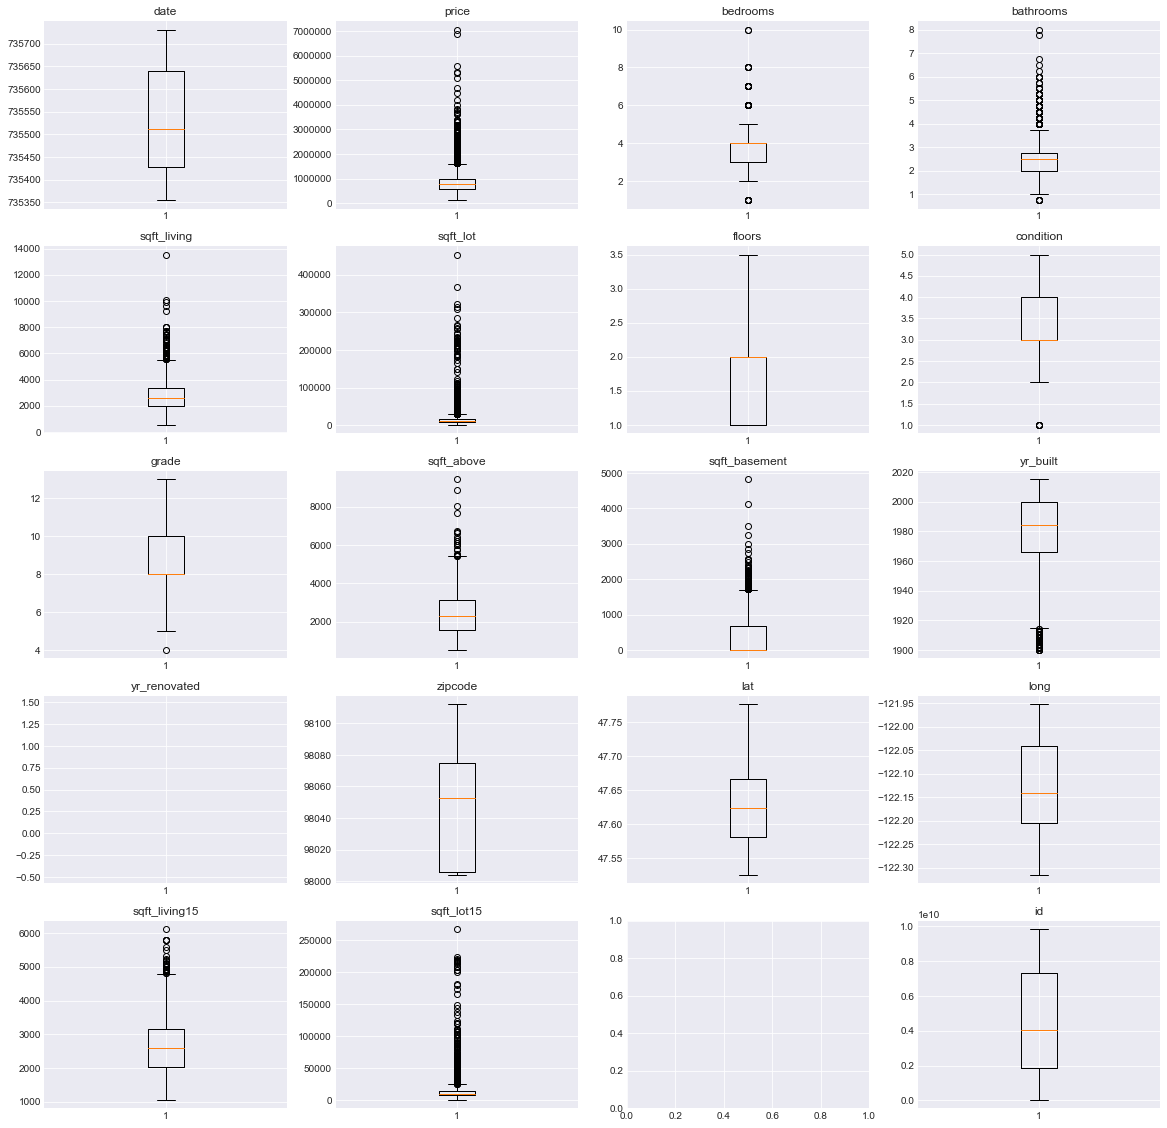

In [25]:
box_list = list(df_top_zip.columns)
box_list.remove('waterfront')

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(box_list):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df_top_zip[column]
#     y=df.price
    ax.boxplot(x=x)
    ax.set_title(box_list[n])
plt.show()   

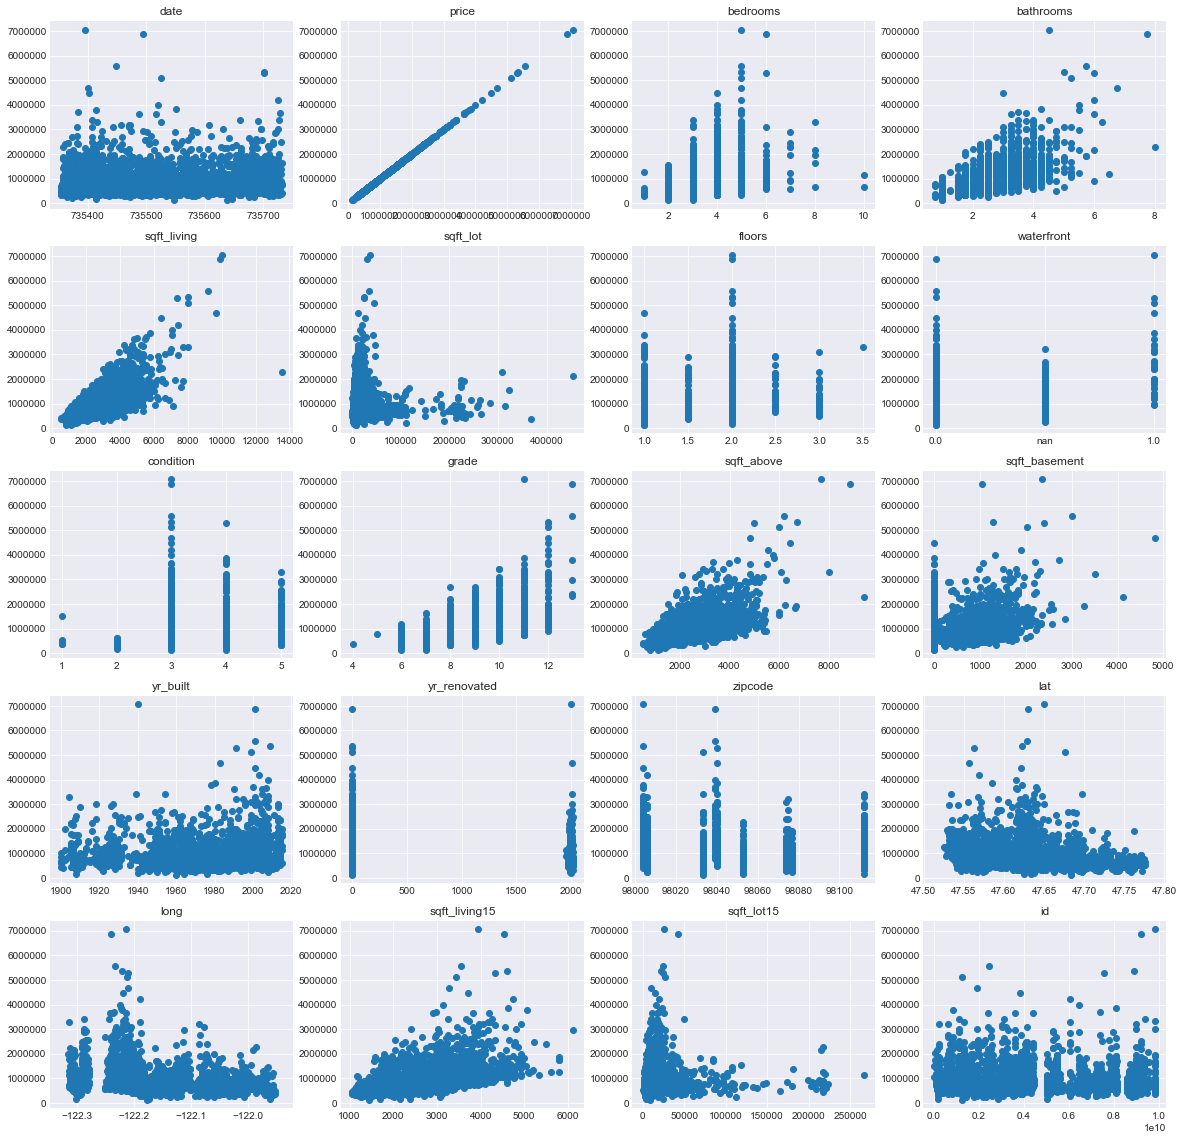

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(df_top_zip.columns):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df_top_zip[column]
    y=df_top_zip.price
    ax.scatter(x, y)
    ax.set_title(df_top_zip.columns.values[n])
plt.show()   

### Investigating multicollinearity

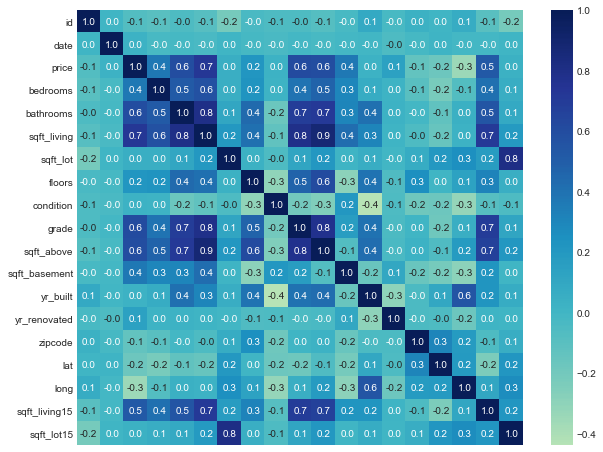

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df_top_zip.corr(), center=0, cmap="YlGnBu", annot=True, fmt=".1f", annot_kws={'size':10}, xticklabels=False)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig('images/heatmap.png')
plt.show()


In [28]:
correlation_df = df_top_zip.corr()
correlation_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.004197,-0.072561,-0.097088,-0.048326,-0.087069,-0.212432,-0.030574,-0.053810,-0.048444,-0.083656,-0.022469,0.095123,-0.027294,0.037869,0.007965,0.071681,-0.091226,-0.210786
date,0.004197,1.000000,0.028610,-0.027630,-0.020767,-0.028695,0.005349,-0.021416,-0.031237,-0.013869,-0.026779,-0.008867,-0.000988,-0.045072,-0.020273,0.014711,-0.011753,-0.008908,0.006759
price,-0.072561,0.028610,1.000000,0.370082,0.601021,0.725306,0.047001,0.215821,0.025737,0.615902,0.597040,0.371540,0.023982,0.142075,-0.136483,-0.169639,-0.347710,0.525086,0.038250
bedrooms,-0.097088,-0.027630,0.370082,1.000000,0.520524,0.577827,0.047149,0.235819,0.021688,0.392482,0.471902,0.302899,0.066424,0.018856,-0.094527,-0.222303,-0.075676,0.414127,0.061008
bathrooms,-0.048326,-0.020767,0.601021,0.520524,1.000000,0.803328,0.102307,0.441975,-0.164291,0.685504,0.716726,0.309084,0.406146,0.029782,-0.010975,-0.128821,0.042740,0.549592,0.094366
sqft_living,-0.087069,-0.028695,0.725306,0.577827,0.803328,1.000000,0.198010,0.413557,-0.126011,0.787340,0.871379,0.423196,0.303950,0.016518,-0.049848,-0.155642,0.025892,0.715847,0.190337
sqft_lot,-0.212432,0.005349,0.047001,0.047149,0.102307,0.198010,1.000000,0.034593,-0.046774,0.113314,0.211058,0.012666,0.057087,-0.001842,0.067545,0.198696,0.253471,0.175589,0.805072
floors,-0.030574,-0.021416,0.215821,0.235819,0.441975,0.413557,0.034593,1.000000,-0.304394,0.476624,0.611760,-0.289251,0.396076,-0.059928,0.253490,0.002162,0.134946,0.317765,0.045789
condition,-0.053810,-0.031237,0.025737,0.021688,-0.164291,-0.126011,-0.046774,-0.304394,1.000000,-0.201122,-0.251023,0.207472,-0.438029,-0.050418,-0.180276,-0.172372,-0.320243,-0.089197,-0.051811
grade,-0.048444,-0.013869,0.615902,0.392482,0.685504,0.787340,0.113314,0.476624,-0.201122,1.000000,0.777299,0.164724,0.399951,-0.040987,0.001298,-0.181413,0.052870,0.695382,0.117474


In [29]:
correlation_df.applymap(lambda val: abs(val) >= 0.75)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
date,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False


In [30]:
corr_data = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_data[corr_data[0] < 1][:11]

,level_0,level_1,0
195,sqft_above,sqft_living,0.876678
105,sqft_living,sqft_above,0.876678
104,sqft_living,grade,0.763101
176,grade,sqft_living,0.763101
328,sqft_living15,sqft_living,0.756389
112,sqft_living,sqft_living15,0.756389
181,grade,sqft_above,0.756382
199,sqft_above,grade,0.756382
99,sqft_living,bathrooms,0.755278
81,bathrooms,sqft_living,0.755278


> It appears that there is strong correlation between:
 - sqft living/sqft above
 - sqft living/grade
 - sqft living 15/sqft living
 - grade/sqft above
 - bathrooms/sqft living
 
 > Check pairplots

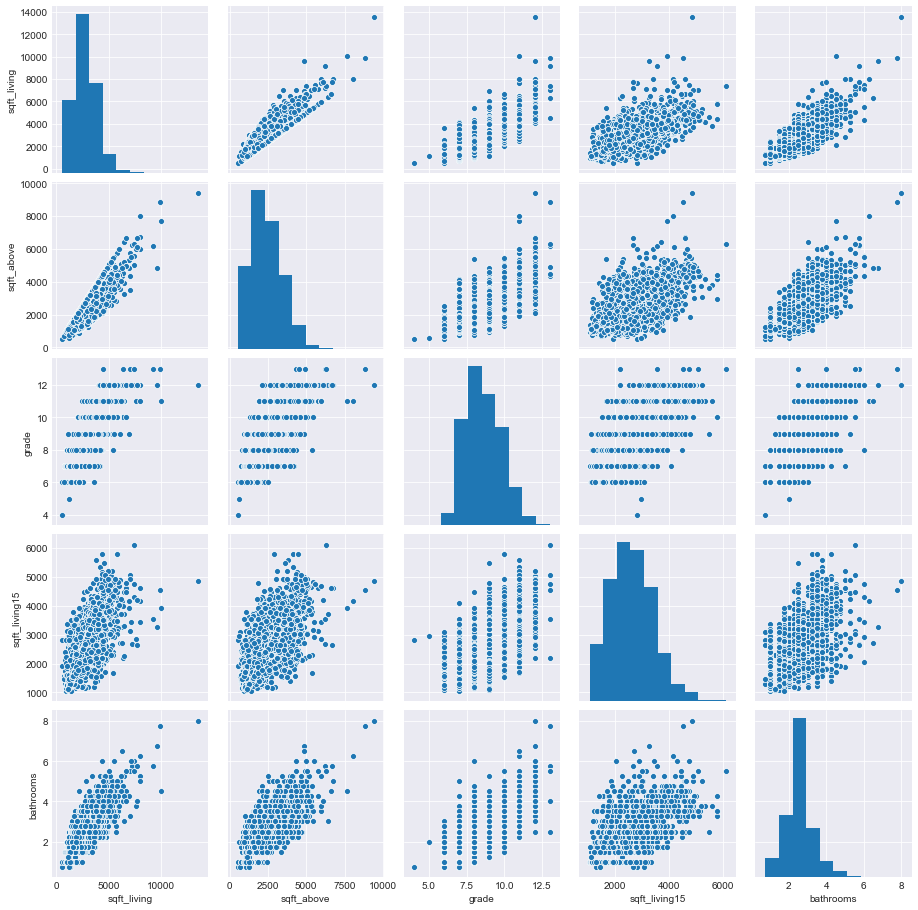

In [31]:
sns.pairplot(df_top_zip[["sqft_living", "sqft_above", "grade", "sqft_living15", "bathrooms"]]);
plt.savefig('images/multicolinear_pairplot.png')

## Prepare data for modeling 
### One Hot Encoding

Divide data into categorical and continuous. 
Create dummy variables for categorical data so they can be read into model

In [32]:
df_top_zip['yr_renovated'].value_counts()

0.0       2513
2014.0      10
2007.0       9
2003.0       8
2000.0       7
2005.0       6
2009.0       6
2001.0       6
1992.0       5
2010.0       5
1990.0       5
1997.0       4
2013.0       4
2002.0       4
1991.0       4
1980.0       4
2006.0       3
1985.0       3
2012.0       3
1993.0       3
2015.0       3
1979.0       3
2004.0       3
1995.0       3
1970.0       3
2008.0       2
1987.0       2
1986.0       2
1988.0       2
1989.0       2
1982.0       2
1999.0       2
1963.0       1
1956.0       1
1984.0       1
1954.0       1
1977.0       1
2011.0       1
1973.0       1
1996.0       1
1975.0       1
1998.0       1
Name: yr_renovated, dtype: int64

> Rather than one hot encoding the yr_renovated variable since there were so many possible values, we decided to create bins instead.  There will be one bin for every 20 years of the last 100 years (which covers all years in the data).  There will also be a bin for yr_renovated == 0, which we interpret as meaning the house has never been renovated.  Then there will also be a bin for any NaN values in yr_renovated.

In [33]:
df_top_zip = df_top_zip.assign(reno_2000_over=
                               df_top_zip.yr_renovated.map(lambda year: 1 if year >= 2000 else 0))

In [34]:
df_top_zip = df_top_zip.assign(reno_1980_2000=
                               df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1980 and year < 2000) else 0))

In [35]:
df_top_zip = df_top_zip.assign(reno_1960_1980=
                               df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1960 and year < 1980) else 0))

In [36]:
df_top_zip = df_top_zip.assign(reno_1940_1960=
                               df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1940 and year < 1960) else 0))

In [37]:
df_top_zip = df_top_zip.assign(reno_1920_1940=
                               df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1920 and year < 1940) else 0))

In [38]:
df_top_zip = df_top_zip.assign(reno_never=
                               df_top_zip["yr_renovated"].map(lambda year: 1 if year == 0 else 0))

In [39]:
df_top_zip = df_top_zip.assign(reno_nan=
                               df_top_zip["yr_renovated"].map(lambda year:  1 if np.isnan(year) else 0))

In [40]:
df_top_zip

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,long,sqft_living15,sqft_lot15,reno_2000_over,reno_1980_2000,reno_1960_1980,reno_1940_1960,reno_1920_1940,reno_never,reno_nan
4,1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,-122.045,1800,7503,0,0,0,0,0,1,0
5,7237550310,735365,1230000.0,4,4.50,5420,101930,1.0,0.0,3,...,-122.005,4760,101930,0,0,0,0,0,1,0
13,6054650070,735513,400000.0,3,1.75,1370,9680,1.0,0.0,4,...,-122.045,1370,10208,0,0,0,0,0,1,0
21,2524049179,735471,2000000.0,3,2.75,3050,44867,1.0,0.0,3,...,-122.233,4110,20336,0,0,0,0,0,1,0
27,3303700376,735568,667000.0,3,1.00,1400,1581,1.5,0.0,5,...,-122.314,1860,3861,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21536,688000017,735411,516500.0,1,1.25,1100,638,3.0,nan,3,...,-122.307,1110,1933,0,0,0,0,0,1,0
21552,524059330,735628,1700000.0,4,3.50,3830,8963,2.0,0.0,3,...,-122.197,2190,10777,0,0,0,0,0,1,0
21574,7430200100,735367,1220000.0,4,3.50,4910,9444,1.5,0.0,3,...,-122.066,4560,11063,0,0,0,0,0,1,0
21583,7202300110,735491,810000.0,4,3.00,3990,7838,2.0,0.0,3,...,-122.046,3370,6814,0,0,0,0,0,0,1


In [41]:
df_nona = df_top_zip.drop(columns = ["yr_renovated", "reno_nan"])

> We needed to drop a yr_renovated dummy variable to prevent multicolinearity so we have chosen to drop the dummy column reno_nan

In [42]:
categorical = ["waterfront", "condition", "grade", "floors", "bedrooms", "zipcode"]
continuous = ["id", "date", "price", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", 
              "sqft_basement", "yr_built", "lat", "long", "sqft_living15", "sqft_lot15"]

** year renovated was not included in categorical list, as it has been manually binned as a dummy variable

In [43]:
df_cat = pd.DataFrame([])

for col in categorical:
    df_cat = pd.concat([df_cat, pd.get_dummies(df_nona[col], prefix= col[:3], drop_first=True)], axis=1)

In [44]:
df_cat.columns

Index(['wat_1.0', 'wat_nan', 'con_2', 'con_3', 'con_4', 'con_5', 'gra_5',
       'gra_6', 'gra_7', 'gra_8', 'gra_9', 'gra_10', 'gra_11', 'gra_12',
       'gra_13', 'flo_1.5', 'flo_2.0', 'flo_2.5', 'flo_3.0', 'flo_3.5',
       'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_10',
       'zip_98006', 'zip_98033', 'zip_98039', 'zip_98040', 'zip_98053',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98112'],
      dtype='object')

> Dummy variables that got dropped:
* Reno_nan
* Waterfront_0.0
* Condition_1
* Grade_4
* Floors_1.0
* Bedrooms_1
* Zip_98004

> Now the results of our model will be changes in price relative to these values.

In [45]:
df_joined = pd.concat([df_nona, df_cat], axis=1)

In [46]:
df_joined.drop(columns = categorical, axis=1, inplace = True)

In [47]:
df_joined.columns

Index(['id', 'date', 'price', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'reno_2000_over', 'reno_1980_2000',
       'reno_1960_1980', 'reno_1940_1960', 'reno_1920_1940', 'reno_never',
       'wat_1.0', 'wat_nan', 'con_2', 'con_3', 'con_4', 'con_5', 'gra_5',
       'gra_6', 'gra_7', 'gra_8', 'gra_9', 'gra_10', 'gra_11', 'gra_12',
       'gra_13', 'flo_1.5', 'flo_2.0', 'flo_2.5', 'flo_3.0', 'flo_3.5',
       'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_10',
       'zip_98006', 'zip_98033', 'zip_98039', 'zip_98040', 'zip_98053',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98112'],
      dtype='object')

> We feel we have a clean and one hot encoded dataset right now and this would be a good place to save our data to a csv

In [48]:
df_joined.to_csv("data/df_joined.csv", index=False)

### Remove data outliers

We will now use IQR to remove price outliers from the dataset before our train test split, and check the new distribution

In [49]:
def remove_outliers(df, column_name):
    q1 = df[column_name].describe()['25%']
    q3 = df[column_name].describe()['75%']
    iqr = q3 - q1
    return df.loc[(df[column_name]>=(q1-(1.5*iqr))) & (df[column_name]<=(q3+(1.5*iqr)))]

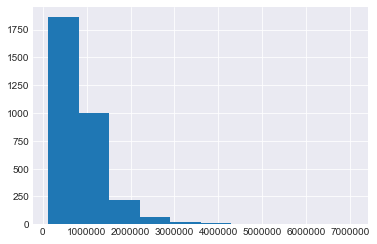

In [50]:
plt.hist(x=df_joined["price"]); # This is our current price distribution

> The scale of our price histogram indicates that there are some very high price values that may be skewing our data.

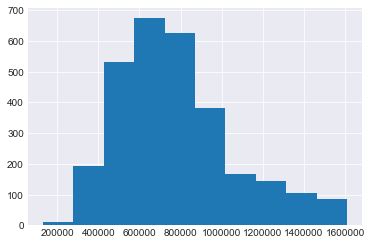

In [51]:
plt.hist(x = remove_outliers(df_joined, "price")["price"]);

> The distribution looks much more Normal now, although still with a heavy upper tail

In [52]:
y = remove_outliers(df_joined, "price")["price"]
X = remove_outliers(df_joined, "price").drop(columns = "price", axis=1)

## Train, test, split and run model 1

We have chosen to split our data 80% for training and 20% for testing.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [54]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train ,X_int).fit()
summary = model.summary()           #The baseline model is defined as 'model'.
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     160.6
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:12   Log-Likelihood:                -30867.
No. Observations:                2334   AIC:                         6.184e+04
Df Residuals:                    2283   BIC:                         6.213e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.502e+08   2.53e+07     -9.879      0.000      -3e+08      -2e+08
id             -8.114e-07   1.04e-06     -0.778      0.436   -2.86e-06    1.23e-06
date             105.5687     25.081      4.209      0.000      56.385     154.753
bathrooms       3.672e+04   6882.165      5.335      0.000    2.32e+04    5.02e+04
sqft_living       76.4520      4.562     16.759      0.000      67.506      85.398
sqft_lot           0.2518      0.163      1.540      0.124      -0.069       0.572
sqft_above        60.7503      4.521     13.436      0.000      51.884      69.617
sqft_basement     15.0964      4.986      3.028      0.002       5.318      24.875
yr_built         446.6796    226.002      1.976      0.048       3.489     889.870
lat             5.342e+05   1.89e+05      2.824      0.005    1.63e+05    9.05e+05
long           -1.199e+06   1.41e+05     -8.488      0.000   -1.48e+06   -9.22e+05
sqft_living15     54.2103      6.360      8.523      0.000      41.738      66.683
sqft_lot15         0.0383      0.217      0.177      0.860      -0.386       0.463
reno_2000_over  5.832e+04   2.41e+04      2.417      0.016     1.1e+04    1.06e+05
reno_1980_2000   3.74e+04   2.71e+04      1.382      0.167   -1.57e+04    9.05e+04
reno_1960_1980 -9.071e+04   5.49e+04     -1.652      0.099   -1.98e+05     1.7e+04
reno_1940_1960  1.689e+05   9.95e+04      1.697      0.090   -2.63e+04    3.64e+05
reno_1920_1940   5.14e-07    2.9e-07      1.773      0.076   -5.46e-08    1.08e-06
reno_never      -1.76e+04   7590.431     -2.318      0.021   -3.25e+04   -2712.339
wat_1.0         5.291e+05   6.05e+04      8.752      0.000    4.11e+05    6.48e+05
wat_nan        -7507.3223   8958.592     -0.838      0.402   -2.51e+04    1.01e+04
con_2           4.672e+04    8.2e+04      0.570      0.569   -1.14e+05    2.08e+05
con_3           9.929e+04   6.87e+04      1.446      0.148   -3.54e+04    2.34e+05
con_4           1.311e+05   6.85e+04      1.913      0.056   -3285.742    2.65e+05
con_5            1.89e+05   6.92e+04      2.732      0.006    5.34e+04    3.25e+05
gra_5           3.921e+05   2.19e+05      1.793      0.073   -3.68e+04    8.21e+05
gra_6           7.985e+04   1.72e+05      0.463      0.643   -2.58e+05    4.18e+05
gra_7           9.158e+04   1.71e+05      0.535      0.593   -2.44e+05    4.28e+05
gra_8           1.431e+05   1.71e+05      0.836      0.403   -1.92e+05    4.79e+05
gra_9           2.345e+05   1.71e+05      1.368      0.172   -1.02e+05    5.71e+05
gra_10          2.763e+05   1.72e+05      1.609      0.108   -6.04e+04    6.13e+05
gra_11          3.711e+05   1.72e+05      2.155      0.031    3.34e+04    7.09e+05
gra_12          4.611e+05   1.75e+05      2.630      0.009    1.17e+05    8.05e+05
gra_13         -9.293e-11   8.63e-11     -1.076      0.282   -2.62e-10    7.64e-11
flo_1.5     

> * Our **baseline model** has an adjusted R squared value of .774.
* The Skew is 0.468
* The Kurtosis is 5.445
* The Jarque-Bera score is 666.713
* There are 2334 observations
* The Df Model is 50
* The train RMSE is 134041


In [55]:
y_hat = model.predict()
train_rmse = mean_squared_error(y_train,y_hat)**.5
train_rmse

134041.96298701665

> Check normality assumption with QQ plot

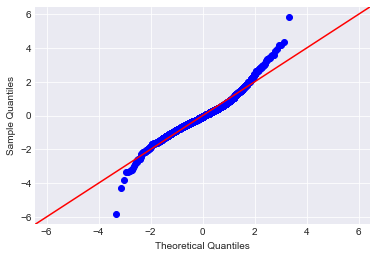

In [56]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.savefig('images/baselineQQplot.png')

> This QQ plot indicates that our data has very heavy tails compared to a normal distribution of residuals.

In [57]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 666.7129357958048),
 ('Prob', 1.6792891623624488e-145),
 ('Skew', 0.46845304021746154),
 ('Kurtosis', 5.444967689894317)]

> The Jarque-Bera result is very high indicating that our results are not normally distributed.

> Next we will check for homoscedasticity.

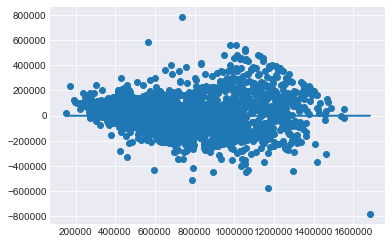

In [58]:
plt.scatter(model.predict(X_int), model.resid)
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))]);

> This displays a slight 'funnel' shape: errors appear to increase as the list_price reaches 1 million, then decrease. This indicates slight heteroscedasticity.

### Eliminate high p-values and remodel

Check the p-values for each independent variable in the model and remove those that are insignificant at alpha = .05

In [59]:
p_table = summary.tables[1]
p_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,-2.502e+08,2.53e+07,-9.879,0.000,-3e+08,-2e+08
id,-8.114e-07,1.04e-06,-0.778,0.436,-2.86e-06,1.23e-06
date,105.5687,25.081,4.209,0.000,56.385,154.753
bathrooms,3.672e+04,6882.165,5.335,0.000,2.32e+04,5.02e+04
sqft_living,76.4520,4.562,16.759,0.000,67.506,85.398
sqft_lot,0.2518,0.163,1.540,0.124,-0.069,0.572
sqft_above,60.7503,4.521,13.436,0.000,51.884,69.617
sqft_basement,15.0964,4.986,3.028,0.002,5.318,24.875
yr_built,446.6796,226.002,1.976,0.048,3.489,889.870
lat,5.342e+05,1.89e+05,2.824,0.005,1.63e+05,9.05e+05


In [60]:
p_table_df = pd.DataFrame(p_table.data) # Convert p_table data to dataframe
p_table_df.columns=['column','coef','std err','t','P>|t|','0.025','0.975']
p_table_df.drop(labels=0,axis=0,inplace=True)
p_table_df.set_index('column',inplace=True)
p_table_df['P>|t|'] = p_table_df['P>|t|'].astype(float)
p_table_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, const to zip_98112
Data columns (total 6 columns):
coef       56 non-null object
std err    56 non-null object
t          56 non-null object
P>|t|      56 non-null float64
0.025      56 non-null object
0.975      56 non-null object
dtypes: float64(1), object(5)
memory usage: 3.1+ KB


In [61]:
p_table_df['pass']=p_table_df['P>|t|'].map(lambda x: x<=.05) # Calculate pass_list of variables with significant p_values
pass_list=list(p_table_df[p_table_df['pass']==True].index)
pass_list

['const',
 'date',
 'bathrooms',
 'sqft_living',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'reno_2000_over',
 'reno_never',
 'wat_1.0',
 'con_5',
 'gra_11',
 'gra_12',
 'flo_2.0',
 'flo_3.0',
 'bed_7',
 'zip_98006',
 'zip_98033',
 'zip_98039',
 'zip_98040',
 'zip_98053',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98112']

In [62]:
len(pass_list)

28

Of our 55 number of independent variables, 27 (not including the constant) have significantly low p-values so we can reject the null hypothesis that there is no relationship between these variables and the dependent variable.

In [63]:
pass_list.remove('const')
trained2 = X_train[pass_list] # Eliminating high p_values

> Recheck multicolinearity

In [64]:
trained2.corr().applymap(lambda val: abs(val) >= 0.75)

,date,bathrooms,sqft_living,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,reno_2000_over,...,bed_7,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
date,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
reno_2000_over,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [65]:
corr_data = trained2.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_data[corr_data[0] < 1][:10]

,level_0,level_1,0
83,sqft_above,sqft_living,0.856139
57,sqft_living,sqft_above,0.856139
29,bathrooms,sqft_living,0.757508
55,sqft_living,bathrooms,0.757508
218,sqft_living15,sqft_living,0.749152
62,sqft_living,sqft_living15,0.749152
89,sqft_above,sqft_living15,0.693520
219,sqft_living15,sqft_above,0.693520
30,bathrooms,sqft_above,0.658669
82,sqft_above,bathrooms,0.658669


> There seems to be significant multicollinearity between certain independent variables. To reduce this, we will remove sqft_living which seems to be highly correlated with many variables.

In [66]:
trained2.drop(columns = "sqft_living", inplace = True)

C:\Users\swzoe\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


> Now we will adjust the test data in the same way as the trained data

In [67]:
test2 = X_test[pass_list]
test2.drop(columns = "sqft_living", inplace = True)

## Run model number 2

In [68]:
X_int_2 = sm.add_constant(trained2)
model2 = sm.OLS(y_train, X_int_2).fit()
summary2 = model2.summary()
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     270.6
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:12   Log-Likelihood:                -30994.
No. Observations:                2334   AIC:                         6.204e+04
Df Residuals:                    2307   BIC:                         6.220e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.596e+08   2.62e+07     -9.925      0.000   -3.11e+08   -2.08e+08
date             116.7319     26.222      4.452      0.000      65.311     168.153
bathrooms       3.411e+04   6959.709      4.901      0.000    2.05e+04    4.78e+04
sqft_above       170.1643      6.752     25.201      0.000     156.923     183.406
sqft_basement    103.1606      8.299     12.431      0.000      86.887     119.434
yr_built         988.7289    204.387      4.838      0.000     587.928    1389.530
lat             4.469e+05   1.91e+05      2.339      0.019    7.22e+04    8.22e+05
long           -1.235e+06   1.45e+05     -8.502      0.000   -1.52e+06    -9.5e+05
sqft_living15     80.2275      6.338     12.659      0.000      67.799      92.656
reno_2000_over  4.782e+04   2.47e+04      1.936      0.053    -617.297    9.63e+04
reno_never         -2e+04   7679.630     -2.605      0.009   -3.51e+04   -4944.899
wat_1.0         5.407e+05   6.01e+04      8.993      0.000    4.23e+05    6.59e+05
con_5           6.707e+04   1.25e+04      5.354      0.000    4.25e+04    9.16e+04
gra_11           9.28e+04    1.5e+04      6.178      0.000    6.33e+04    1.22e+05
gra_12          1.449e+05   3.63e+04      3.994      0.000    7.37e+04    2.16e+05
flo_2.0        -4.156e+04   8884.142     -4.678      0.000    -5.9e+04   -2.41e+04
flo_3.0        -8.894e+04    3.5e+04     -2.539      0.011   -1.58e+05   -2.03e+04
bed_7          -6.167e+05   1.45e+05     -4.259      0.000   -9.01e+05   -3.33e+05
zip_98006      -2.493e+05   1.81e+04    -13.777      0.000   -2.85e+05   -2.14e+05
zip_98033      -2.769e+05   1.86e+04    -14.906      0.000   -3.13e+05    -2.4e+05
zip_98039       1.194e+05   4.46e+04      2.679      0.007     3.2e+04    2.07e+05
zip_98040       -1.33e+05   1.85e+04     -7.202      0.000   -1.69e+05   -9.68e+04
zip_98053      -2.454e+05   3.26e+04     -7.526      0.000   -3.09e+05   -1.81e+05
zip_98074      -2.464e+05   2.63e+04     -9.350      0.000   -2.98e+05   -1.95e+05
zip_98075      -2.071e+05   2.93e+04     -7.066      0.000   -2.65e+05    -1.5e+05
zip_98077      -3.673e+05   3.78e+04     -9.719      0.000   -4.41e+05   -2.93e+05
zip_98112      -1.562e+05   2.09e+04     -7.459      0.000   -1.97e+05   -1.15e+05
==============================================================================
Omnibus:                      224.323   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.527
Skew:                           0.484   Prob(JB):                    7.63e-153
Kurtosis:                       5.503   Cond. No.                     6.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditio

> * Our **model2** has an adjusted R squared value of .750.
* The Skew is 0.484
* The Kurtosis is 5.503
* The Jarque-Bera score is 700.527
* There are 2334 observations
* The Df Model is 26
* The train RMSE is 141559

In [69]:
y_hat2 = model2.predict()
train_rmse2 = mean_squared_error(y_train ,y_hat2)**.5
train_rmse2

141559.428288108

> Our r squared value decreased signifying that less variance in the data is explained by the model, the root mean square error increased, signifying slightly more average error when predicting. However, the p-values in the model are now mostly significant in terms of their relationship with the dependent variable.  The R squared has gone down largely in part to removing many of the independent variables.

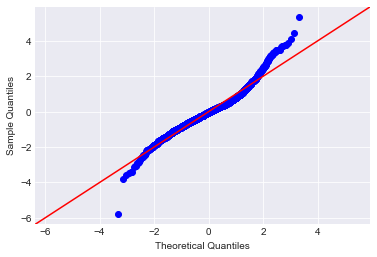

In [70]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

> The residuals appear to be similarly distributed in this second iteration of the model as in the first.

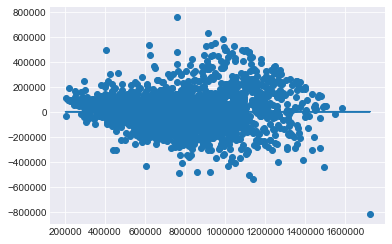

In [71]:
plt.scatter(model2.predict(X_int_2), model2.resid)
plt.plot(model2.predict(X_int_2), [0 for i in range(len(X_int_2))]);

>The heteroscedasticity of the data appears to be largely unchanged. 

### Eliminate multicollinearity and high p-values

We will now feature engineer for the third iteration of the model by removing other independent variables that are not significant based on their p_values and multicollinearity

In [72]:
trained3 = trained2.drop(columns = ["reno_2000_over"]) # This is the only feature with a high p_value

In [73]:
trained3.corr().applymap(lambda val: abs(val) >= 0.75)

,date,bathrooms,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,reno_never,wat_1.0,...,bed_7,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
date,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
reno_never,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
wat_1.0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [74]:
corr_data = trained3.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_data[corr_data[0] < 1][:20]

,level_0,level_1,0
177,sqft_living15,sqft_above,0.693520
57,sqft_above,sqft_living15,0.693520
51,sqft_above,bathrooms,0.658669
27,bathrooms,sqft_above,0.658669
327,flo_2.0,sqft_above,0.630580
63,sqft_above,flo_2.0,0.630580
154,long,yr_built,0.589931
106,yr_built,long,0.589931
580,zip_98077,lat,0.557837
148,lat,zip_98077,0.557837


>While there are no extremely correlated features (above 0.75) there still seems to be potential mulitcollinearity between sqft_above and other features. We will remove sqft_above to see if it improves the model.

In [75]:
trained3.drop(columns = "sqft_above", inplace = True)

>Update the test data to match the train data

In [76]:
test3 = test2.drop(columns = ["sqft_above"])

In [77]:
len(trained3), len(y_train)

(2334, 2334)

## Run model number 3

In [78]:
X_int_3 = sm.add_constant(trained3)
model3 = sm.OLS(y_train, X_int_3).fit()
summary3 = model3.summary()
summary3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:13   Log-Likelihood:                -31279.
No. Observations:                2334   AIC:                         6.261e+04
Df Residuals:                    2309   BIC:                         6.275e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.286e+08   2.95e+07     -7.751      0.000   -2.86e+08   -1.71e+08
date            100.3252     29.596      3.390      0.001      42.289     158.362
bathrooms      1.165e+05   6909.634     16.859      0.000    1.03e+05     1.3e+05
sqft_basement    15.3388      8.495      1.806      0.071      -1.319      31.997
yr_built        890.2440    228.998      3.888      0.000     441.181    1339.307
lat            4.949e+05   2.16e+05      2.295      0.022     7.2e+04    9.18e+05
long          -1.063e+06   1.64e+05     -6.493      0.000   -1.38e+06   -7.42e+05
sqft_living15   165.0831      6.023     27.409      0.000     153.272     176.894
reno_never    -2.272e+04   8409.733     -2.701      0.007   -3.92e+04   -6227.440
wat_1.0         4.24e+05   6.77e+04      6.265      0.000    2.91e+05    5.57e+05
con_5          5.333e+04   1.41e+04      3.784      0.000    2.57e+04     8.1e+04
gra_11         1.533e+05   1.67e+04      9.161      0.000    1.21e+05    1.86e+05
gra_12         2.115e+05   4.08e+04      5.178      0.000    1.31e+05    2.92e+05
flo_2.0        2.024e+04   9643.525      2.099      0.036    1330.728    3.92e+04
flo_3.0       -4.439e+04   3.95e+04     -1.124      0.261   -1.22e+05    3.31e+04
bed_7         -2.533e+05   1.63e+05     -1.557      0.120   -5.72e+05    6.57e+04
zip_98006     -2.552e+05   2.04e+04    -12.493      0.000   -2.95e+05   -2.15e+05
zip_98033     -2.778e+05    2.1e+04    -13.255      0.000   -3.19e+05   -2.37e+05
zip_98039      1.049e+05   5.03e+04      2.084      0.037    6202.992    2.04e+05
zip_98040     -1.214e+05   2.08e+04     -5.822      0.000   -1.62e+05   -8.05e+04
zip_98053     -2.558e+05   3.68e+04     -6.949      0.000   -3.28e+05   -1.84e+05
zip_98074     -2.712e+05   2.97e+04     -9.123      0.000    -3.3e+05   -2.13e+05
zip_98075     -2.241e+05   3.31e+04     -6.778      0.000   -2.89e+05   -1.59e+05
zip_98077     -3.706e+05   4.27e+04     -8.684      0.000   -4.54e+05   -2.87e+05
zip_98112     -1.531e+05   2.36e+04     -6.498      0.000   -1.99e+05   -1.07e+05
==============================================================================
Omnibus:                      223.896   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.445
Skew:                           0.577   Prob(JB):                    1.18e-112
Kurtosis:                       4.993   Cond. No.                     6.52e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> * Our **model3** has an adjusted R squared value of .682.
* The Skew is 0.577
* The Kurtosis is 4.993
* The Jarque-Bera score is 515.445
* There are 2334 observations
* The Df Model is 24
* The train RMSE is 159918

In [79]:
y_hat3 = model3.predict()
train_rmse3 = mean_squared_error(y_train ,y_hat3)**.5
train_rmse3

159918.8341062173

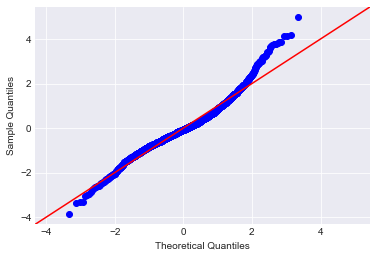

In [80]:
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

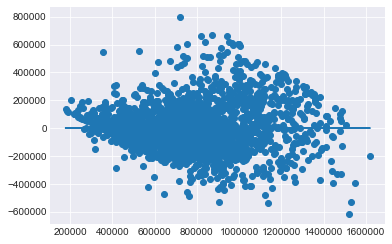

In [81]:
plt.scatter(model3.predict(X_int_3), model3.resid)
plt.plot(model3.predict(X_int_3), [0 for i in range(len(X_int_3))]);

> In this third iteration of the model, the r squared has decreased and our mean square error increases. The model displays slightly more normally distributed residuals, but still some heteroscedasticity. It appears that the previous changes did not improve the model significantly. 

### Return feature to model

In [82]:
trained4 = trained2.drop(columns = ["reno_2000_over"])  # Rather than adding the column back, we took the dataframe
# back 2 iteration and didn't remove sqft_above as we had before

>Update the test data to match the train data

In [83]:
test4 = test2.drop(columns = ["reno_2000_over"])

## Run model number 4

In [84]:
X_int_4 = sm.add_constant(trained4)
model4 = sm.OLS(y_train, X_int_4).fit()
summary4 = model4.summary()
summary4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     280.9
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:14   Log-Likelihood:                -30996.
No. Observations:                2334   AIC:                         6.204e+04
Df Residuals:                    2308   BIC:                         6.219e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.608e+08   2.62e+07     -9.967      0.000   -3.12e+08   -2.09e+08
date            115.6944     26.232      4.410      0.000      64.254     167.135
bathrooms      3.573e+04   6913.464      5.168      0.000    2.22e+04    4.93e+04
sqft_above      169.9176      6.755     25.154      0.000     156.671     183.164
sqft_basement   103.4460      8.302     12.460      0.000      87.166     119.726
yr_built        939.5982    202.926      4.630      0.000     541.662    1337.534
lat            4.593e+05   1.91e+05      2.404      0.016    8.46e+04    8.34e+05
long          -1.247e+06   1.45e+05     -8.587      0.000   -1.53e+06   -9.62e+05
sqft_living15    79.4780      6.330     12.556      0.000      67.065      91.891
reno_never    -2.363e+04   7452.005     -3.171      0.002   -3.82e+04   -9018.580
wat_1.0        5.378e+05   6.01e+04      8.942      0.000     4.2e+05    6.56e+05
con_5          6.518e+04   1.25e+04      5.216      0.000    4.07e+04    8.97e+04
gra_11         9.245e+04    1.5e+04      6.152      0.000     6.3e+04    1.22e+05
gra_12         1.446e+05   3.63e+04      3.985      0.000    7.34e+04    2.16e+05
flo_2.0       -4.115e+04   8886.891     -4.630      0.000   -5.86e+04   -2.37e+04
flo_3.0       -8.825e+04    3.5e+04     -2.518      0.012   -1.57e+05   -1.95e+04
bed_7         -6.203e+05   1.45e+05     -4.282      0.000   -9.04e+05   -3.36e+05
zip_98006     -2.487e+05   1.81e+04    -13.737      0.000   -2.84e+05   -2.13e+05
zip_98033     -2.783e+05   1.86e+04    -14.989      0.000   -3.15e+05   -2.42e+05
zip_98039        1.2e+05   4.46e+04      2.692      0.007    3.26e+04    2.08e+05
zip_98040     -1.331e+05   1.85e+04     -7.204      0.000   -1.69e+05   -9.69e+04
zip_98053     -2.449e+05   3.26e+04     -7.507      0.000   -3.09e+05   -1.81e+05
zip_98074     -2.454e+05   2.64e+04     -9.311      0.000   -2.97e+05   -1.94e+05
zip_98075     -2.052e+05   2.93e+04     -7.002      0.000   -2.63e+05   -1.48e+05
zip_98077     -3.679e+05   3.78e+04     -9.730      0.000   -4.42e+05   -2.94e+05
zip_98112     -1.594e+05   2.09e+04     -7.636      0.000      -2e+05   -1.18e+05
==============================================================================
Omnibus:                      224.306   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.080
Skew:                           0.481   Prob(JB):                    1.75e-154
Kurtosis:                       5.521   Cond. No.                     6.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+09. This might indicate that there are
strong multicollinearity or other numerical prob

> * Our **model4** has an adjusted R squared value of .750.
* The Skew is 0.481
* The Kurtosis is 5.521
* The Jarque-Bera score is 708.080
* There are 2334 observations
* The Df Model is 25
* The train RMSE is 141674

In [85]:
y_hat4 = model4.predict()
train_rmse4 = mean_squared_error(y_train ,y_hat4)**.5
train_rmse4

141674.3751881596

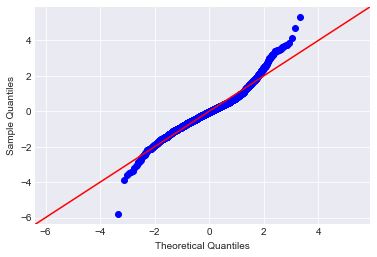

In [86]:
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)

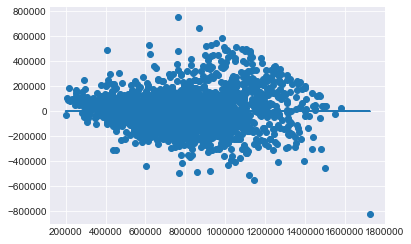

In [87]:
plt.scatter(model4.predict(X_int_4), model4.resid)
plt.plot(model4.predict(X_int_4), [0 for i in range(len(X_int_4))]);

> While the model improved from adding sqft_above back in as an independent variable, it shows similar accuracy average error as model 2, therefore implying that removing renovations from year 2000 and on had little effect.

>Before continuing the iterations, we will run our model on our test set to see if the difference in RSME indicates overfitting

### Check RSME of test set for overfitting of the model

In [88]:
yhat_test = model4.predict(sm.add_constant(test4))

In [89]:
yhat_test

3211     6.225366e+05
15378    4.891039e+05
12183    6.876565e+05
2042     1.104787e+06
4710     7.285789e+05
             ...     
5048     5.639126e+05
11053    7.298729e+05
11754    4.742048e+05
16615    6.721425e+05
6349     1.182858e+06
Length: 584, dtype: float64

In [90]:
test_rmse = mean_squared_error(y_test, yhat_test)**.5
test_rmse

148412.71004992892

>Our model4 training RSME was 141674 versus our testing RSME which was 148412. This indicates that our model has slightly less error in the training data, but still performs fairly well on new data. Therefore, the model doesn't seem to be overfitted.

### Log transforming and normalization

Reexamining the relationships between independent and dependent variables, as well as variable distributions

In [91]:
train4_df = pd.concat([trained4, y_train], axis=1) # putting the x and y value back together in one dataframe

In [92]:
train4_df.columns

Index(['date', 'bathrooms', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'reno_never', 'wat_1.0', 'con_5', 'gra_11',
       'gra_12', 'flo_2.0', 'flo_3.0', 'bed_7', 'zip_98006', 'zip_98033',
       'zip_98039', 'zip_98040', 'zip_98053', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98112', 'price'],
      dtype='object')

In [93]:
continuous = ['date', 'bathrooms', 'sqft_above', 'yr_built', 'lat', 'sqft_living15'] # to be log transformed

> Dropped longitude and sqft_basement from continuous because they can't be logged with zero or negative values

In [94]:
train5_cont = train4_df[continuous] # subsetting the train and test data to log transform
test5_cont = test4[continuous]

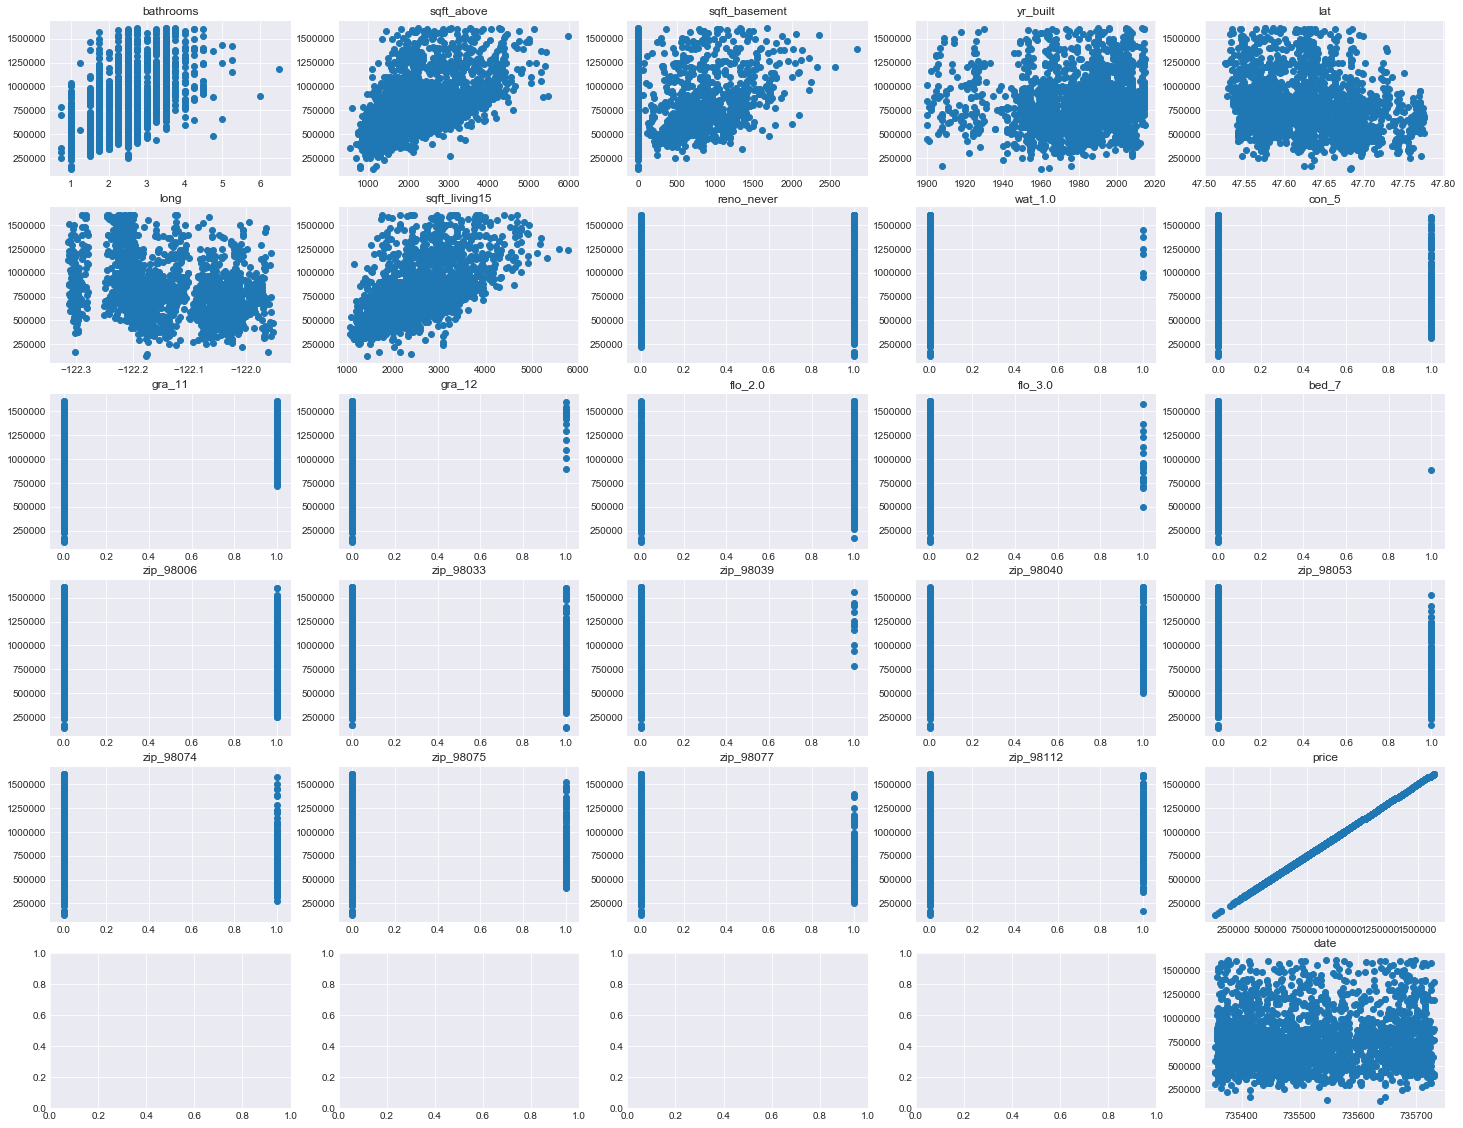

In [95]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(25,20)) # recheck graphs of X vs y
plt.title('Graphs')
for n, column in enumerate(train4_df.columns):
    row=(n-1)//5
    col=n%5 -1
    ax=axes[row][col]
    x=train4_df[column]
    y=train4_df.price
    ax.scatter(x, y)
    ax.set_title(train4_df.columns.values[n])
plt.show()

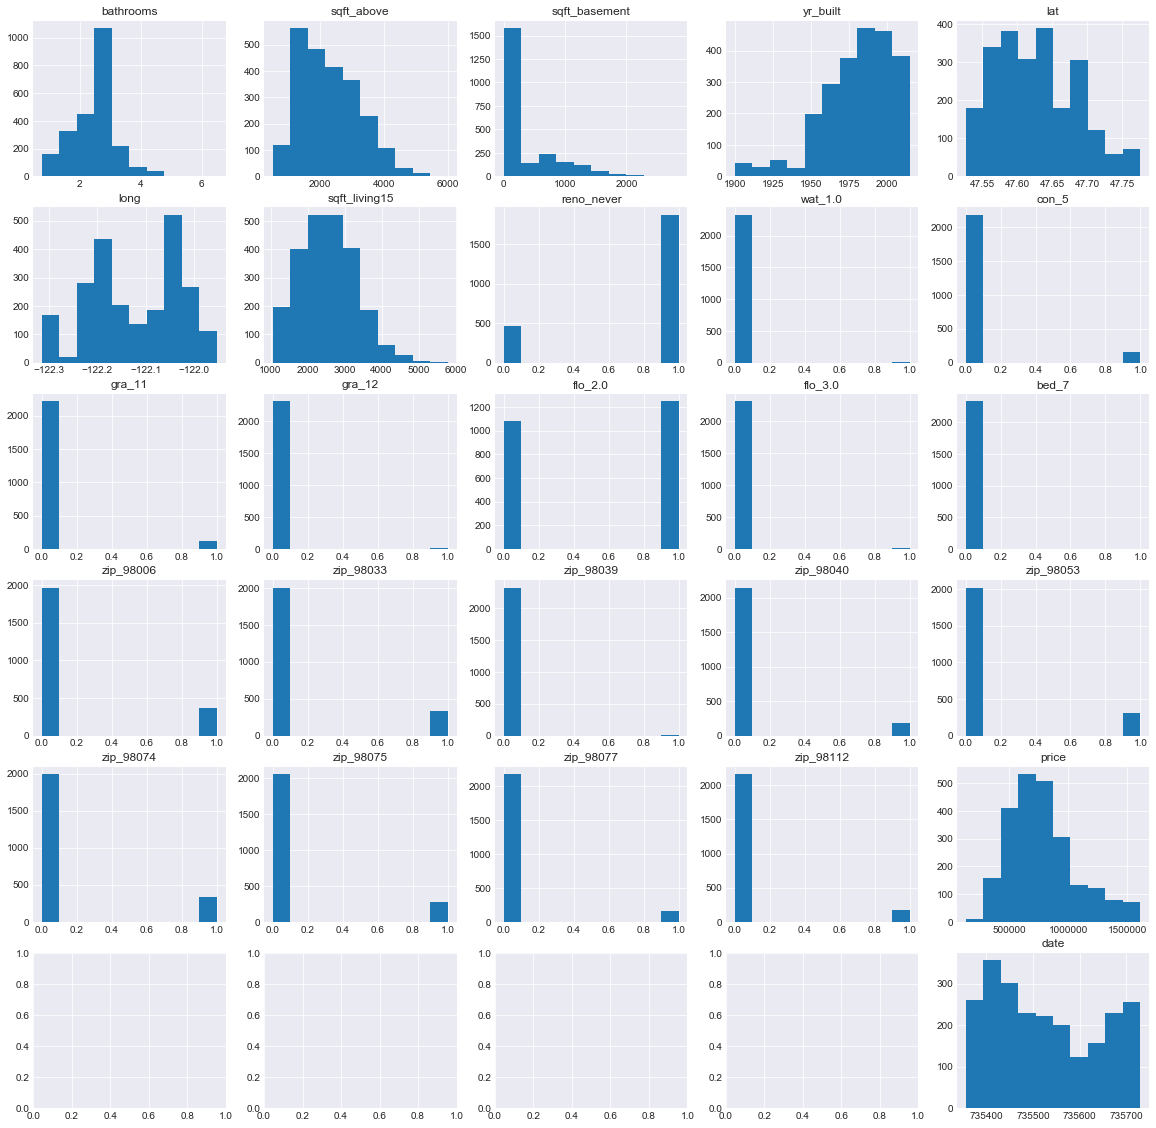

In [96]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(20,20)) # recheck histograms for distributions before logging
plt.title('Graphs')
x = train4_df.price
for n in range(len(train4_df.columns)):
    row=(n-1)//5
    col=n%5-1
    ax=axes[row][col]
    y=train4_df.iloc[:,n]
    ax.hist(y)
    ax.set_title(train4_df.columns.values[n])
plt.show()   

In [97]:
log_names_train = [f'{column}_log' for column in continuous] # create column names
df_log_train = np.log(train5_cont)                           # log continuous variable in train set
df_log_train.columns=log_names_train                         # assign new column names
df_log_train

,date_log,bathrooms_log,sqft_above_log,yr_built_log,lat_log,sqft_living15_log
3734,13.508608,0.916291,7.640123,7.598900,3.864367,7.640123
3253,13.508599,1.321756,7.986165,7.565275,3.863652,7.757906
16826,13.508277,0.223144,6.956545,7.605392,3.863238,7.003065
5106,13.508268,0.810930,7.649693,7.592366,3.863820,7.625595
8767,13.508474,0.810930,7.200425,7.583248,3.862234,7.757906
...,...,...,...,...,...,...
20113,13.508162,0.916291,7.855545,7.607381,3.864621,7.506592
6271,13.508294,0.559616,7.554859,7.588830,3.863412,7.855545
7679,13.508170,0.810930,7.682482,7.594381,3.863610,7.522941
1611,13.508117,0.916291,7.843849,7.603399,3.862681,7.843849


In [98]:
log_names_test = [f'{column}_log' for column in test5_cont.columns] # create column names
df_log_test = np.log(test5_cont)                                    # log continuous variable in test set
df_log_test.columns=log_names_test                                  # assign new column names
df_log_test

,date_log,bathrooms_log,sqft_above_log,yr_built_log,lat_log,sqft_living15_log
3211,13.508371,0.693147,7.420579,7.580189,3.864097,7.700748
15378,13.508449,0.000000,7.265430,7.577634,3.862244,7.265430
12183,13.508114,0.916291,8.016318,7.600402,3.862990,7.933797
2042,13.508294,1.098612,7.908387,7.579168,3.862482,7.878534
4710,13.508401,0.916291,7.177782,7.580700,3.864690,7.625595
...,...,...,...,...,...,...
5048,13.508515,0.559616,7.539027,7.589842,3.862650,7.912057
11053,13.508173,0.559616,7.390181,7.591357,3.861763,7.969012
11754,13.508200,0.693147,7.358831,7.603898,3.865120,7.680176
16615,13.508133,0.810930,7.969012,7.589336,3.863452,7.851661


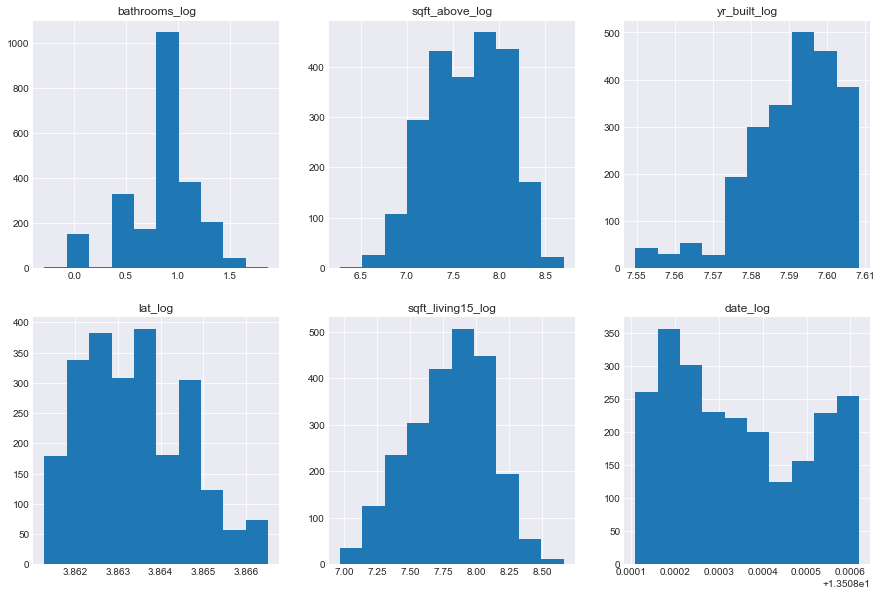

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10)) # plot logged variable histograms
plt.title('Graphs')
for n in range(len(df_log_train.columns)):
    row=(n-1)//3
    col=n%3-1
    ax=axes[row][col]
    y=df_log_train.iloc[:,n]
    ax.hist(y)
    ax.set_title(df_log_train.columns.values[n])
plt.savefig('images/logged_histograms.png')
plt.show()


> We can see that logging has made the variables appear more normally distributed.

In [100]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log_train.apply(normalize)       # normalize the logged variables in the train set
df_log_norm

,date_log,bathrooms_log,sqft_above_log,yr_built_log,lat_log,sqft_living15_log
3734,1.725808,0.240959,-0.043985,0.655176,0.790080,-0.533414
3253,1.672796,1.501413,0.793429,-2.181100,0.198342,-0.146858
16826,-0.421533,-1.913802,-1.698230,1.202766,-0.143705,-2.624195
5106,-0.483401,-0.086571,-0.020827,0.104007,0.337204,-0.581095
8767,0.859888,-0.086571,-1.108046,-0.665145,-0.974235,-0.146858
...,...,...,...,...,...,...
20113,-1.172828,0.240959,0.477331,1.370543,0.999949,-0.971655
6271,-0.315475,-0.867823,-0.250324,-0.194275,0.000424,0.173585
7679,-1.119792,-0.086571,0.058524,0.273981,0.163623,-0.917999
1611,-1.464530,0.240959,0.449027,1.034655,-0.604042,0.135199


In [101]:
df_log_norm_test = df_log_test.apply(normalize)  # normalize the logged variables in the test set
df_log_norm_test

,date_log,bathrooms_log,sqft_above_log,yr_built_log,lat_log,sqft_living15_log
3211,0.135493,-0.453223,-0.515743,-0.804380,0.617846,-0.303155
15378,0.636605,-2.654390,-0.889705,-1.008670,-0.958717,-1.767041
12183,-1.526368,0.255394,0.920186,0.811418,-0.323808,0.480542
2042,-0.365658,0.834377,0.660037,-0.886033,-0.756568,0.294705
4710,0.328910,0.255394,-1.100964,-0.763584,1.123086,-0.555878
...,...,...,...,...,...,...
5048,1.067355,-0.877267,-0.230244,-0.032802,-0.613483,0.407435
11053,-1.148235,-0.877267,-0.589012,0.088348,-1.368530,0.598963
11754,-0.972367,-0.453223,-0.664577,1.090855,1.488886,-0.372335
16615,-1.403252,-0.079190,0.806163,-0.073226,0.069419,0.204337


In [102]:
trained5_log = pd.concat([df_log_norm, 
                          trained4.drop(columns = 
                                        ["bathrooms", "sqft_above", "yr_built", "lat", "sqft_living15", "date"])
                         ], axis =1)

In [103]:
trained5_log

,date_log,bathrooms_log,sqft_above_log,yr_built_log,lat_log,sqft_living15_log,sqft_basement,long,reno_never,wat_1.0,...,bed_7,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
3734,1.725808,0.240959,-0.043985,0.655176,0.790080,-0.533414,0.0,-122.199,0,0,...,0,0,1,0,0,0,0,0,0,0
3253,1.672796,1.501413,0.793429,-2.181100,0.198342,-0.146858,310.0,-122.219,0,0,...,0,0,0,0,0,0,0,0,0,0
16826,-0.421533,-1.913802,-1.698230,1.202766,-0.143705,-2.624195,180.0,-122.304,1,0,...,0,0,0,0,0,0,0,0,0,1
5106,-0.483401,-0.086571,-0.020827,0.104007,0.337204,-0.581095,0.0,-122.061,1,0,...,0,0,0,0,0,0,1,0,0,0
8767,0.859888,-0.086571,-1.108046,-0.665145,-0.974235,-0.146858,1000.0,-122.124,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20113,-1.172828,0.240959,0.477331,1.370543,0.999949,-0.971655,0.0,-122.210,1,0,...,0,0,1,0,0,0,0,0,0,0
6271,-0.315475,-0.867823,-0.250324,-0.194275,0.000424,0.173585,0.0,-122.053,0,0,...,0,0,0,0,0,0,1,0,0,0
7679,-1.119792,-0.086571,0.058524,0.273981,0.163623,-0.917999,0.0,-122.029,1,0,...,0,0,0,0,0,0,1,0,0,0
1611,-1.464530,0.240959,0.449027,1.034655,-0.604042,0.135199,0.0,-122.004,1,0,...,0,0,0,0,0,0,0,1,0,0


In [104]:
test5_log = pd.concat([df_log_norm_test, 
                       test4.drop(columns = 
                                  ["bathrooms", "sqft_above", "yr_built", "lat", "sqft_living15", "date"])
                      ], axis =1)

In [105]:
test5_log

,date_log,bathrooms_log,sqft_above_log,yr_built_log,lat_log,sqft_living15_log,sqft_basement,long,reno_never,wat_1.0,...,bed_7,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
3211,0.135493,-0.453223,-0.515743,-0.804380,0.617846,-0.303155,0.0,-122.188,1,0,...,0,0,1,0,0,0,0,0,0,0
15378,0.636605,-2.654390,-0.889705,-1.008670,-0.958717,-1.767041,0.0,-122.147,1,0,...,0,1,0,0,0,0,0,0,0,0
12183,-1.526368,0.255394,0.920186,0.811418,-0.323808,0.480542,0.0,-122.017,1,0,...,0,0,0,0,0,0,1,0,0,0
2042,-0.365658,0.834377,0.660037,-0.886033,-0.756568,0.294705,0.0,-122.242,1,0,...,0,0,0,0,1,0,0,0,0,0
4710,0.328910,0.255394,-1.100964,-0.763584,1.123086,-0.555878,500.0,-122.211,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048,1.067355,-0.877267,-0.230244,-0.032802,-0.613483,0.407435,0.0,-122.010,0,0,...,0,0,0,0,0,0,0,1,0,0
11053,-1.148235,-0.877267,-0.589012,0.088348,-1.368530,0.598963,1300.0,-122.151,1,0,...,0,1,0,0,0,0,0,0,0,0
11754,-0.972367,-0.453223,-0.664577,1.090855,1.488886,-0.372335,0.0,-122.017,1,0,...,0,0,0,0,0,1,0,0,0,0
16615,-1.403252,-0.079190,0.806163,-0.073226,0.069419,0.204337,0.0,-122.052,1,0,...,0,0,0,0,0,0,1,0,0,0


## Run model number 5

In [106]:
X_int_5 = sm.add_constant(trained5_log) # Run 5th model with logged and normalized variables
model5 = sm.OLS(y_train, X_int_5).fit()
summary5 = model5.summary()
summary5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     277.5
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:25   Log-Likelihood:                -31007.
No. Observations:                2334   AIC:                         6.207e+04
Df Residuals:                    2308   BIC:                         6.222e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.271e+08   1.78e+07     -7.139      0.000   -1.62e+08   -9.22e+07
date_log           1.361e+04   2981.955      4.565      0.000    7763.548    1.95e+04
bathrooms_log      1.484e+04   4946.485      3.000      0.003    5137.290    2.45e+04
sqft_above_log     1.627e+05   6131.959     26.539      0.000    1.51e+05    1.75e+05
yr_built_log         2.5e+04   4791.764      5.218      0.000    1.56e+04    3.44e+04
lat_log            1.949e+04   1.11e+04      1.760      0.078   -2222.903    4.12e+04
sqft_living15_log  5.507e+04   4714.001     11.682      0.000    4.58e+04    6.43e+04
sqft_basement       106.5595      8.195     13.002      0.000      90.488     122.631
long              -1.049e+06   1.46e+05     -7.200      0.000   -1.33e+06   -7.63e+05
reno_never         -2.57e+04   7487.599     -3.432      0.001   -4.04e+04    -1.1e+04
wat_1.0            5.439e+05   6.03e+04      9.016      0.000    4.26e+05    6.62e+05
con_5              6.679e+04   1.26e+04      5.310      0.000    4.21e+04    9.14e+04
gra_11             1.615e+05   1.47e+04     11.021      0.000    1.33e+05     1.9e+05
gra_12             2.766e+05   3.59e+04      7.699      0.000    2.06e+05    3.47e+05
flo_2.0           -5.249e+04   9053.055     -5.798      0.000   -7.02e+04   -3.47e+04
flo_3.0           -1.033e+05   3.52e+04     -2.932      0.003   -1.72e+05   -3.42e+04
bed_7              -4.16e+05   1.45e+05     -2.876      0.004      -7e+05   -1.32e+05
zip_98006         -2.602e+05   1.82e+04    -14.298      0.000   -2.96e+05   -2.25e+05
zip_98033         -2.628e+05   1.87e+04    -14.083      0.000   -2.99e+05   -2.26e+05
zip_98039            1.4e+05   4.48e+04      3.125      0.002    5.21e+04    2.28e+05
zip_98040         -1.379e+05   1.86e+04     -7.417      0.000   -1.74e+05   -1.01e+05
zip_98053         -2.629e+05   3.28e+04     -8.024      0.000   -3.27e+05   -1.99e+05
zip_98074         -2.686e+05   2.65e+04    -10.149      0.000    -3.2e+05   -2.17e+05
zip_98075         -2.318e+05   2.94e+04     -7.874      0.000    -2.9e+05   -1.74e+05
zip_98077         -3.695e+05    3.8e+04     -9.725      0.000   -4.44e+05   -2.95e+05
zip_98112         -1.216e+05    2.1e+04     -5.784      0.000   -1.63e+05   -8.04e+04
==============================================================================
Omnibus:                      223.561   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.621
Skew:                           0.546   Prob(JB):                    3.35e-124
Kurtosis:                       5.158   Cond. No.                     3.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The cond

> * Our **model5** has an adjusted R squared value of .748.
* The Skew is 0.546
* The Kurtosis is 5.158
* The Jarque-Bera score is 568.621
* There are 2334 observations
* The Df Model is 25
* The train RMSE is 142327

In [107]:
y_hat5 = model5.predict()
y_hat5

array([ 791606.30763633, 1201549.7610529 ,  586387.02797228, ...,
        512075.38600569,  648418.53129569,  981998.48685133])

In [108]:
train_rmse5 = mean_squared_error(y_train ,y_hat5)**.5
train_rmse5

142327.4927215527

In [109]:
trained5_log.corr().applymap(lambda val: abs(val) >= 0.75)

,date_log,bathrooms_log,sqft_above_log,yr_built_log,lat_log,sqft_living15_log,sqft_basement,long,reno_never,wat_1.0,...,bed_7,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
date_log,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms_log,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above_log,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built_log,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lat_log,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living15_log,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
reno_never,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
wat_1.0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [110]:
corr_data = trained5_log.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_data[corr_data[0] < 1][:20]

,level_0,level_1,0
55,sqft_above_log,sqft_living15_log,0.679610
127,sqft_living15_log,sqft_above_log,0.679610
27,bathrooms_log,sqft_above_log,0.665884
51,sqft_above_log,bathrooms_log,0.665884
63,sqft_above_log,flo_2.0,0.648647
327,flo_2.0,sqft_above_log,0.648647
178,long,yr_built_log,0.590463
82,yr_built_log,long,0.590463
579,zip_98077,lat_log,0.557432
123,lat_log,zip_98077,0.557432


> Currently no multicollinear variables in the model

### Log transformation of dependent variable

We will now try log transforming the dependent variable to make it more normal and of the same magnitude of the other variables.

In [111]:
yt_log = np.log(y_train)
y_train_log = normalize(yt_log)

## Run model number 6

In [112]:
model6 = sm.OLS(y_train_log, X_int_5).fit()
summary6 = model6.summary()
summary6

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     327.5
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:25   Log-Likelihood:                -1543.7
No. Observations:                2334   AIC:                             3139.
Df Residuals:                    2308   BIC:                             3289.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -443.0940     58.625     -7.558      0.000    -558.058    -328.130
date_log              0.0465      0.010      4.732      0.000       0.027       0.066
bathrooms_log         0.0821      0.016      5.039      0.000       0.050       0.114
sqft_above_log        0.5788      0.020     28.656      0.000       0.539       0.618
yr_built_log          0.0795      0.016      5.039      0.000       0.049       0.110
lat_log               0.0682      0.036      1.870      0.062      -0.003       0.140
sqft_living15_log     0.2460      0.016     15.840      0.000       0.216       0.276
sqft_basement         0.0003    2.7e-05     12.001      0.000       0.000       0.000
long                 -3.6346      0.480     -7.576      0.000      -4.575      -2.694
reno_never           -0.0735      0.025     -2.981      0.003      -0.122      -0.025
wat_1.0               1.6555      0.199      8.331      0.000       1.266       2.045
con_5                 0.2459      0.041      5.935      0.000       0.165       0.327
gra_11                0.3050      0.048      6.317      0.000       0.210       0.400
gra_12                0.4181      0.118      3.533      0.000       0.186       0.650
flo_2.0              -0.1915      0.030     -6.421      0.000      -0.250      -0.133
flo_3.0              -0.2789      0.116     -2.403      0.016      -0.506      -0.051
bed_7                -1.3936      0.476     -2.925      0.003      -2.328      -0.459
zip_98006            -0.8626      0.060    -14.387      0.000      -0.980      -0.745
zip_98033            -0.8775      0.061    -14.274      0.000      -0.998      -0.757
zip_98039             0.3180      0.148      2.154      0.031       0.029       0.607
zip_98040            -0.4719      0.061     -7.706      0.000      -0.592      -0.352
zip_98053            -0.9181      0.108     -8.507      0.000      -1.130      -0.706
zip_98074            -0.8953      0.087    -10.271      0.000      -1.066      -0.724
zip_98075            -0.7297      0.097     -7.526      0.000      -0.920      -0.540
zip_98077            -1.2925      0.125    -10.328      0.000      -1.538      -1.047
zip_98112            -0.3890      0.069     -5.616      0.000      -0.525      -0.253
==============================================================================
Omnibus:                      291.753   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1467.258
Skew:                          -0.486   Prob(JB):                         0.00
Kurtosis:                       6.761   Cond. No.                     3.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The cond

> * Our **model6** has an adjusted R squared value of .778.
* The Skew is -0.486
* The Kurtosis is 6.761
* The Jarque-Bera score is 1467.258
* There are 2334 observations
* The Df Model is 25
* The train RMSE is 138708

With a high R squared and lower RMSE this may be our best model so far

In [113]:
yhat6_log = model6.predict() #Because we logged y, this model predicts logged values
yhat6 = np.exp((yhat6_log * yt_log.std())+ yt_log.mean()) # To get sales prices, un-normalize and un-log
yhat6

array([ 739504.44219798, 1263410.02298978,  529582.50417963, ...,
        517518.92918297,  639420.07909947,  987160.57851635])

In [114]:
train_rmse6 = mean_squared_error(y_train ,yhat6)**.5
train_rmse6

138708.58474563138

In [115]:
yhat6_log = model6.predict()    # This is the logged and normalized RMSE, used for comparing to other models like this
train_rmse6 = mean_squared_error(y_train_log ,yhat6_log)**.5
train_rmse6

0.4688224592271913

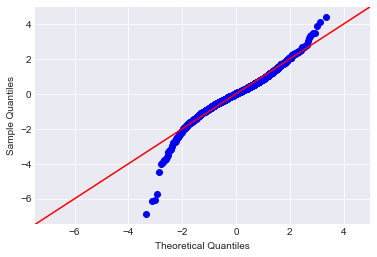

In [116]:
fig = sm.graphics.qqplot(model6.resid, dist=stats.norm, line='45', fit=True)

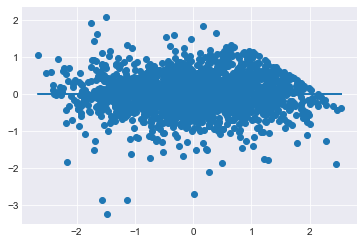

In [117]:
plt.scatter(model6.predict(X_int_5), model6.resid)
plt.plot(model6.predict(X_int_5), [0 for i in range(len(X_int_5))]);

### Check RMSE of test set for overfitting

In [118]:
ytest_log = np.log(y_test)  # log and normalize test y values
y_test_log = normalize(ytest_log)

In [119]:
yhat_test = model6.predict(sm.add_constant(test5_log))

In [120]:
yhat_test

3211    -0.361924
15378   -1.107797
12183   -0.123576
2042     1.295610
4710    -0.166452
           ...   
5048    -0.461681
11053   -0.039779
11754   -0.968528
16615   -0.195579
6349     1.495132
Length: 584, dtype: float64

In [121]:
yhat_test6 = np.exp((yhat_test * ytest_log.std())+ ytest_log.mean()) # Un-log and un-normalize predictions
yhat_test6

3211     6.371571e+05
15378    4.909176e+05
12183    6.925201e+05
2042     1.137345e+06
4710     6.822177e+05
             ...     
5048     6.153207e+05
11053    7.131066e+05
11754    5.154094e+05
16615    6.753064e+05
6349     1.219505e+06
Length: 584, dtype: float64

In [122]:
test_rmse = mean_squared_error(y_test, yhat_test6)**.5
test_rmse

142311.26845134198

>  This value is not far off from our training RMSE so we are probably not overfitting our training data

### Examine polynomial features and/or interactions

In [123]:
continuous = ['date','bathrooms','sqft_living','sqft_above','sqft_basement',
              'yr_built','lat','long','sqft_living15','sqft_lot15']

> Starting back at our initial dataset to look at polynomials and interactions, rather than starting from the logged and normalized data

In [124]:
y = y_train
X = X_train[continuous]
poly = PolynomialFeatures(2)    # For simplicity, we are only looking at second order features
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns = poly.get_feature_names(input_features=X.columns))
X_poly_df                       # This dataframe has all possible continuous variable combinations
# print(poly.get_feature_names())
# print(X_poly[0])

,1,date,bathrooms,sqft_living,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,...,lat^2,lat long,lat sqft_living15,lat sqft_lot15,long^2,long sqft_living15,long sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2
0,1.0,735722.0,2.50,2080.0,2080.0,0.0,1996.0,47.6731,-122.199,2080.0,...,2272.724464,-5825.605147,99160.048,190692.4000,14932.595601,-254173.92,-488796.000,4326400.0,8320000.0,16000000.0
1,1.0,735716.0,3.75,3250.0,2940.0,310.0,1930.0,47.6390,-122.219,2340.0,...,2269.474321,-5822.390941,111475.260,725732.5260,14937.483961,-285992.46,-1861884.246,5475600.0,35647560.0,232074756.0
2,1.0,735479.0,1.25,1230.0,1050.0,180.0,2009.0,47.6193,-122.304,1100.0,...,2267.597732,-5824.030867,52381.230,58571.7390,14958.268416,-134534.40,-150433.920,1210000.0,1353000.0,1512900.0
3,1.0,735472.0,2.25,2100.0,2100.0,0.0,1983.0,47.6470,-122.061,2050.0,...,2270.236609,-5815.840467,97676.350,425487.7100,14898.887721,-250225.05,-1090004.730,4202500.0,18306500.0,79744900.0
4,1.0,735624.0,2.25,2340.0,1340.0,1000.0,1965.0,47.5715,-122.124,2340.0,...,2263.047612,-5809.621866,111317.310,646972.4000,14914.271376,-285770.16,-1660886.400,5475600.0,31824000.0,184960000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,1.0,735394.0,2.50,2580.0,2580.0,0.0,2013.0,47.6852,-122.210,1820.0,...,2273.878299,-5827.608292,86787.064,275238.9744,14935.284100,-222422.20,-705396.120,3312400.0,10505040.0,33315984.0
2330,1.0,735491.0,1.75,1910.0,1910.0,0.0,1976.0,47.6276,-122.053,2580.0,...,2268.388282,-5813.091463,122879.208,587057.7976,14896.934809,-314896.74,-1504425.278,6656400.0,31801080.0,151930276.0
2331,1.0,735400.0,2.25,2170.0,2170.0,0.0,1987.0,47.6370,-122.029,1850.0,...,2269.283769,-5813.095473,88128.450,422492.5530,14891.076841,-225753.65,-1082275.201,3422500.0,16407650.0,78659161.0
2332,1.0,735361.0,2.50,2550.0,2550.0,0.0,2005.0,47.5928,-122.004,2550.0,...,2265.074612,-5806.511971,121361.640,245150.5128,14884.976016,-311110.20,-628442.604,6502500.0,13135050.0,26532801.0


In [125]:
from sklearn.feature_selection import RFE     # Using Recursive Feature Elimination to select variables
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=20)
selector = selector.fit(X_poly_df, y)
selector.support_
# selector.ranking_

array([False, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False])

In [126]:
poly_feature_list = list(filter(lambda x: x[1] == True, list(zip(X_poly_df.columns, selector.support_))))

In [127]:
cols = [x[0] for x in poly_feature_list]
cols

['bathrooms',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'date sqft_living',
 'date sqft_above',
 'date sqft_basement',
 'bathrooms lat',
 'bathrooms long',
 'sqft_living^2',
 'sqft_living sqft_basement',
 'sqft_living sqft_lot15',
 'sqft_above sqft_lot15',
 'sqft_basement sqft_lot15',
 'yr_built lat',
 'lat^2',
 'lat long',
 'long^2']

> These are the 20 features recommended by RFE.  The first 6 are base variables and the other 14 are interactions or polynomials.

In [128]:
X_train_cat = X_train.drop(columns = continuous) # Separate out the categoricals
X_train_cat

,id,sqft_lot,reno_2000_over,reno_1980_2000,reno_1960_1980,reno_1940_1960,reno_1920_1940,reno_never,wat_1.0,wat_nan,...,bed_10,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
3734,4070700300,3729,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3253,540100057,10949,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16826,955000430,1569,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5106,8651510020,7335,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8767,6028000090,14279,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20113,3885802135,3909,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6271,7504001440,12142,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7679,8078410210,7737,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1611,6127011000,4630,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [129]:
cat_index_list=list(X_train_cat.index)  # Saving index of categoricals

In [130]:
X_poly_df = X_poly_df[cols]  # Slicing poly dataframe into just the variables recommended by RFE

In [131]:
X_poly_df = X_poly_df.assign(idx= cat_index_list)
# X_poly_df['idx'] = cat_index_list  # this code gives an error so we used .assign above
X_poly_df

,bathrooms,sqft_above,sqft_basement,yr_built,lat,long,date sqft_living,date sqft_above,date sqft_basement,bathrooms lat,...,sqft_living^2,sqft_living sqft_basement,sqft_living sqft_lot15,sqft_above sqft_lot15,sqft_basement sqft_lot15,yr_built lat,lat^2,lat long,long^2,idx
0,2.50,2080.0,0.0,1996.0,47.6731,-122.199,1.530302e+09,1.530302e+09,0.0,119.182750,...,4326400.0,0.0,8320000.0,8320000.0,0.0,95155.5076,2272.724464,-5825.605147,14932.595601,3734
1,3.75,2940.0,310.0,1930.0,47.6390,-122.219,2.391077e+09,2.163005e+09,228071960.0,178.646250,...,10562500.0,1007500.0,49510500.0,44787960.0,4722540.0,91943.2700,2269.474321,-5822.390941,14937.483961,3253
2,1.25,1050.0,180.0,2009.0,47.6193,-122.304,9.046392e+08,7.722530e+08,132386220.0,59.524125,...,1512900.0,221400.0,1512900.0,1291500.0,221400.0,95667.1737,2267.597732,-5824.030867,14958.268416,16826
3,2.25,2100.0,0.0,1983.0,47.6470,-122.061,1.544491e+09,1.544491e+09,0.0,107.205750,...,4410000.0,0.0,18753000.0,18753000.0,0.0,94484.0010,2270.236609,-5815.840467,14898.887721,5106
4,2.25,1340.0,1000.0,1965.0,47.5715,-122.124,1.721360e+09,9.857362e+08,735624000.0,107.035875,...,5475600.0,2340000.0,31824000.0,18224000.0,13600000.0,93477.9975,2263.047612,-5809.621866,14914.271376,8767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,2.50,2580.0,0.0,2013.0,47.6852,-122.210,1.897317e+09,1.897317e+09,0.0,119.213000,...,6656400.0,0.0,14891760.0,14891760.0,0.0,95990.3076,2273.878299,-5827.608292,14935.284100,20113
2330,1.75,1910.0,0.0,1976.0,47.6276,-122.053,1.404788e+09,1.404788e+09,0.0,83.348300,...,3648100.0,0.0,23542660.0,23542660.0,0.0,94112.1376,2268.388282,-5813.091463,14896.934809,6271
2331,2.25,2170.0,0.0,1987.0,47.6370,-122.029,1.595818e+09,1.595818e+09,0.0,107.183250,...,4708900.0,0.0,19245730.0,19245730.0,0.0,94654.7190,2269.283769,-5813.095473,14891.076841,7679
2332,2.50,2550.0,0.0,2005.0,47.5928,-122.004,1.875171e+09,1.875171e+09,0.0,118.982000,...,6502500.0,0.0,13135050.0,13135050.0,0.0,95423.5640,2265.074612,-5806.511971,14884.976016,1611


In [132]:
X_poly_df.set_index('idx',inplace=True)  # Change to same index as categoricals so we can concatenate

In [133]:
X_poly_reg = pd.concat([X_poly_df, X_train_cat], axis=1)
X_poly_reg.head()

,bathrooms,sqft_above,sqft_basement,yr_built,lat,long,date sqft_living,date sqft_above,date sqft_basement,bathrooms lat,...,bed_10,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
3734,2.50,2080.0,0.0,1996.0,47.6731,-122.199,1.530302e+09,1.530302e+09,0.0,119.182750,...,0,0,1,0,0,0,0,0,0,0
3253,3.75,2940.0,310.0,1930.0,47.6390,-122.219,2.391077e+09,2.163005e+09,228071960.0,178.646250,...,0,0,0,0,0,0,0,0,0,0
16826,1.25,1050.0,180.0,2009.0,47.6193,-122.304,9.046392e+08,7.722530e+08,132386220.0,59.524125,...,0,0,0,0,0,0,0,0,0,1
5106,2.25,2100.0,0.0,1983.0,47.6470,-122.061,1.544491e+09,1.544491e+09,0.0,107.205750,...,0,0,0,0,0,0,1,0,0,0
8767,2.25,1340.0,1000.0,1965.0,47.5715,-122.124,1.721360e+09,9.857362e+08,735624000.0,107.035875,...,0,1,0,0,0,0,0,0,0,0


In [134]:
X_poly_reg.columns

Index(['bathrooms', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'date sqft_living', 'date sqft_above', 'date sqft_basement',
       'bathrooms lat', 'bathrooms long', 'sqft_living^2',
       'sqft_living sqft_basement', 'sqft_living sqft_lot15',
       'sqft_above sqft_lot15', 'sqft_basement sqft_lot15', 'yr_built lat',
       'lat^2', 'lat long', 'long^2', 'id', 'sqft_lot', 'reno_2000_over',
       'reno_1980_2000', 'reno_1960_1980', 'reno_1940_1960', 'reno_1920_1940',
       'reno_never', 'wat_1.0', 'wat_nan', 'con_2', 'con_3', 'con_4', 'con_5',
       'gra_5', 'gra_6', 'gra_7', 'gra_8', 'gra_9', 'gra_10', 'gra_11',
       'gra_12', 'gra_13', 'flo_1.5', 'flo_2.0', 'flo_2.5', 'flo_3.0',
       'flo_3.5', 'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7',
       'bed_8', 'bed_10', 'zip_98006', 'zip_98033', 'zip_98039', 'zip_98040',
       'zip_98053', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98112'],
      dtype='object')

## Run model 'poly'

In [135]:
X_int_poly = sm.add_constant(X_poly_reg)
model_poly = sm.OLS(y_train, X_int_poly).fit()
summary_poly = model_poly.summary()
summary_poly

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     141.5
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:26   Log-Likelihood:                -30860.
No. Observations:                2334   AIC:                         6.184e+04
Df Residuals:                    2276   BIC:                         6.217e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -4430.6708   4.43e+04     -0.100      0.920   -9.14e+04    8.25e+04
bathrooms                 -2.319e+07   7.89e+06     -2.937      0.003   -3.87e+07   -7.71e+06
sqft_above                -2.574e+04   8220.444     -3.131      0.002   -4.19e+04   -9620.619
sqft_basement              2.165e+04   3.38e+04      0.640      0.522   -4.47e+04     8.8e+04
yr_built                   1.799e+05   2.01e+05      0.897      0.370   -2.13e+05    5.73e+05
lat                        1.414e+09   3.36e+08      4.209      0.000    7.55e+08    2.07e+09
long                       5.555e+08   1.32e+08      4.210      0.000    2.97e+08    8.14e+08
date sqft_living           8.561e+05   2.03e+05      4.207      0.000    4.57e+05    1.26e+06
date sqft_above           -8.561e+05   2.03e+05     -4.207      0.000   -1.26e+06   -4.57e+05
date sqft_basement        -8.561e+05   2.03e+05     -4.207      0.000   -1.26e+06   -4.57e+05
bathrooms lat             -1.118e+05   9.34e+04     -1.197      0.231   -2.95e+05    7.13e+04
bathrooms long            -2.338e+05   4.85e+04     -4.823      0.000   -3.29e+05   -1.39e+05
sqft_living^2                -0.0171      0.004     -4.658      0.000      -0.024      -0.010
sqft_living sqft_basement     0.0211      0.007      2.912      0.004       0.007       0.035
sqft_living sqft_lot15    -3.247e+05   7.74e+04     -4.197      0.000   -4.76e+05   -1.73e+05
sqft_above sqft_lot15      3.247e+05   7.74e+04      4.197      0.000    1.73e+05    4.76e+05
sqft_basement sqft_lot15   3.247e+05   7.74e+04      4.197      0.000    1.73e+05    4.76e+05
yr_built lat              -3769.7559   4210.097     -0.895      0.371    -1.2e+04    4486.273
lat^2                     -9.671e+06   1.88e+06     -5.146      0.000   -1.34e+07   -5.99e+06
lat long                   3.962e+06   1.85e+06      2.144      0.032    3.38e+05    7.59e+06
long^2                      3.05e+06   8.72e+05      3.497      0.000    1.34e+06    4.76e+06
id                        -9.648e-07   1.05e-06     -0.922      0.357   -3.02e-06    1.09e-06
sqft_lot                      0.2492      0.147      1.694      0.090      -0.039       0.538
reno_2000_over             3.284e+04   2.42e+04      1.359      0.174   -1.45e+04    8.02e+04
reno_1980_2000             4.349e+04   2.71e+04      1.606      0.108   -9623.110    9.66e+04
reno_1960_1980            -9.266e+04   5.49e+04     -1.687      0.092      -2e+05     1.5e+04
reno_1940_1960             1.966e+05   9.95e+04      1.977      0.048    1588.835    3.92e+05
reno_1920_1940               -0.0044      0.001     -4.210      0.000      -0.006      -0.002
reno_never                -1.663e+04   7586.977     -2.192      0.028   -3.15e+04   -1752.242
wat_1.0                    5.469e+05   6.09e+04      8.986      0.000    4.

>* Our **model_poly** has an adjusted R squared value of .774.
* The Skew is 0.366
* The Kurtosis is 5.578
* The Jarque-Bera score is 698.217
* There are 2334 observations
* The Df Model is 57
* The train RMSE is 133636

In [136]:
y_hat_poly = model_poly.predict()

In [137]:
train_rmse_poly = mean_squared_error(y_train ,y_hat_poly)**.5
train_rmse_poly

133636.5870500386

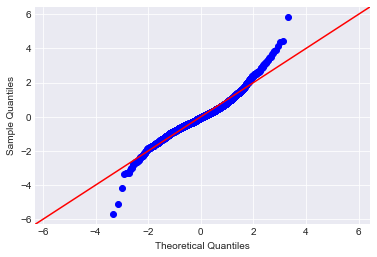

In [138]:
fig = sm.graphics.qqplot(model_poly.resid, dist=stats.norm, line='45', fit=True)

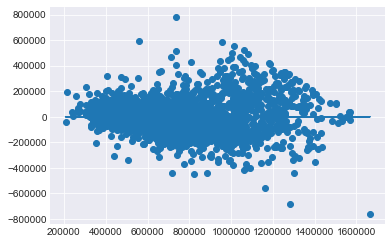

In [139]:
plt.scatter(model_poly.predict(X_int_poly), model_poly.resid)
plt.plot(model_poly.predict(X_int_poly), [0 for i in range(len(X_int_poly))]);

### Examine and eliminate high p-values

In [140]:
p_table = summary_poly.tables[1]
p_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,-4430.6708,4.43e+04,-0.100,0.920,-9.14e+04,8.25e+04
bathrooms,-2.319e+07,7.89e+06,-2.937,0.003,-3.87e+07,-7.71e+06
sqft_above,-2.574e+04,8220.444,-3.131,0.002,-4.19e+04,-9620.619
sqft_basement,2.165e+04,3.38e+04,0.640,0.522,-4.47e+04,8.8e+04
yr_built,1.799e+05,2.01e+05,0.897,0.370,-2.13e+05,5.73e+05
lat,1.414e+09,3.36e+08,4.209,0.000,7.55e+08,2.07e+09
long,5.555e+08,1.32e+08,4.210,0.000,2.97e+08,8.14e+08
date sqft_living,8.561e+05,2.03e+05,4.207,0.000,4.57e+05,1.26e+06
date sqft_above,-8.561e+05,2.03e+05,-4.207,0.000,-1.26e+06,-4.57e+05
date sqft_basement,-8.561e+05,2.03e+05,-4.207,0.000,-1.26e+06,-4.57e+05


In [141]:
p_table_df = pd.DataFrame(p_table.data)   # Building dataframe of p_table
p_table_df.columns=['column','coef','std err','t','P>|t|','0.025','0.975']
p_table_df.drop(labels=0,axis=0,inplace=True)
p_table_df.set_index('column',inplace=True)
p_table_df['P>|t|'] = p_table_df['P>|t|'].astype(float)
p_table_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, const to zip_98112
Data columns (total 6 columns):
coef       66 non-null object
std err    66 non-null object
t          66 non-null object
P>|t|      66 non-null float64
0.025      66 non-null object
0.975      66 non-null object
dtypes: float64(1), object(5)
memory usage: 3.6+ KB


In [142]:
p_table_df['pass']=p_table_df['P>|t|'].map(lambda x: x<=.05)  #Create list of variables with p-value <= .05
pass_list=list(p_table_df[p_table_df['pass']==True].index)
pass_list

['bathrooms',
 'sqft_above',
 'lat',
 'long',
 'date sqft_living',
 'date sqft_above',
 'date sqft_basement',
 'bathrooms long',
 'sqft_living^2',
 'sqft_living sqft_basement',
 'sqft_living sqft_lot15',
 'sqft_above sqft_lot15',
 'sqft_basement sqft_lot15',
 'lat^2',
 'lat long',
 'long^2',
 'reno_1940_1960',
 'reno_1920_1940',
 'reno_never',
 'wat_1.0',
 'con_5',
 'gra_5',
 'gra_11',
 'gra_12',
 'gra_13',
 'flo_2.0',
 'flo_3.0',
 'flo_3.5',
 'bed_6',
 'bed_7',
 'bed_8',
 'bed_10',
 'zip_98006',
 'zip_98033',
 'zip_98039',
 'zip_98040',
 'zip_98053',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98112']

In [143]:
trained_poly = X_poly_reg[pass_list]

### Invesitgate multicollinearity

In [144]:
trained_poly.corr()

,bathrooms,sqft_above,lat,long,date sqft_living,date sqft_above,date sqft_basement,bathrooms long,sqft_living^2,sqft_living sqft_basement,...,bed_10,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
bathrooms,1.000000,0.658669,-0.129036,0.176000,0.757513,0.658673,0.212120,-0.999996,0.723590,0.310783,...,0.049284,0.044047,-0.107500,-0.010412,0.038412,-0.008388,0.044103,0.155160,0.007491,-0.091055
sqft_above,0.658669,1.000000,-0.047383,0.336676,0.856137,1.000000,-0.231322,-0.657991,0.824855,-0.059853,...,0.014416,-0.033421,-0.150509,-0.012507,-0.014220,0.075588,0.061522,0.215527,0.097472,-0.160675
lat,-0.129036,-0.047383,1.000000,0.193064,-0.157345,-0.047387,-0.208888,0.129563,-0.136764,-0.188193,...,-0.025073,-0.520567,0.368080,-0.000990,-0.342876,0.363558,-0.024947,-0.259037,0.557837,0.008885
long,0.176000,0.336676,0.193064,1.000000,0.188456,0.336675,-0.265742,-0.173499,0.179348,-0.195735,...,-0.006937,-0.113932,-0.282440,-0.082345,-0.331040,0.421262,0.345972,0.408986,0.180004,-0.533862
date sqft_living,0.757513,0.856137,-0.157345,0.188456,1.000000,0.856136,0.304690,-0.757309,0.973022,0.441453,...,0.046261,0.076823,-0.148689,-0.010953,0.057841,-0.027785,0.012240,0.162494,0.063501,-0.121963
date sqft_above,0.658673,1.000000,-0.047387,0.336675,0.856136,1.000000,-0.231324,-0.657995,0.824856,-0.059852,...,0.014413,-0.033415,-0.150519,-0.012506,-0.014216,0.075586,0.061517,0.215535,0.097478,-0.160680
date sqft_basement,0.212120,-0.231322,-0.208888,-0.265742,0.304690,-0.231324,1.000000,-0.212987,0.311553,0.941433,...,0.060530,0.206223,-0.002505,0.002430,0.135099,-0.191627,-0.090341,-0.091339,-0.060115,0.066542
bathrooms long,-0.999996,-0.657991,0.129563,-0.173499,-0.757309,-0.657995,-0.212987,1.000000,-0.723360,-0.311486,...,-0.049316,-0.044401,0.106807,0.010205,-0.039345,0.009412,-0.043251,-0.154057,-0.007051,0.089812
sqft_living^2,0.723590,0.824855,-0.136764,0.179348,0.973022,0.824856,0.311553,-0.723360,1.000000,0.483409,...,0.048910,0.078525,-0.131759,-0.015457,0.045779,-0.016814,0.006601,0.137741,0.065153,-0.114337
sqft_living sqft_basement,0.310783,-0.059853,-0.188193,-0.195735,0.441453,-0.059852,0.941433,-0.311486,0.483409,1.000000,...,0.077702,0.190752,-0.022046,-0.004955,0.128460,-0.154088,-0.073301,-0.074651,-0.037351,0.024172


In [145]:
trained_poly.corr().applymap(lambda val: abs(val) >= 0.75)

,bathrooms,sqft_above,lat,long,date sqft_living,date sqft_above,date sqft_basement,bathrooms long,sqft_living^2,sqft_living sqft_basement,...,bed_10,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
bathrooms,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
date sqft_living,True,True,False,False,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
date sqft_above,False,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
date sqft_basement,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
bathrooms long,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living^2,False,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living sqft_basement,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [146]:
corr_data = trained_poly.corr().abs().stack().reset_index().sort_values(0, ascending=False)
table = corr_data[(corr_data[0] < 1) & (corr_data[0] > .75)]
table

,level_0,level_1,0
558,long^2,long,1.000000
126,long,long^2,1.000000
42,sqft_above,date sqft_above,1.000000
186,date sqft_above,sqft_above,1.000000
87,lat,lat^2,1.000000
483,lat^2,lat,1.000000
259,bathrooms long,bathrooms,0.999996
7,bathrooms,bathrooms long,0.999996
417,sqft_above sqft_lot15,sqft_living sqft_lot15,0.980860
381,sqft_living sqft_lot15,sqft_above sqft_lot15,0.980860


>While there is some improvement in the RMSE compared to other models, there is so much multicollinearity in this model that we feel it invalidates our model assumptions.  Obviously, we would need to remove the base variables for any interaction that we kept.

### Examine interactions again starting from current best model


At this point, we will start with our logged and scaled model that has already been adjusted for multicollinearity and look at the interactions again from this point.

In [147]:
summary6

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     327.5
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:25   Log-Likelihood:                -1543.7
No. Observations:                2334   AIC:                             3139.
Df Residuals:                    2308   BIC:                             3289.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -443.0940     58.625     -7.558      0.000    -558.058    -328.130
date_log              0.0465      0.010      4.732      0.000       0.027       0.066
bathrooms_log         0.0821      0.016      5.039      0.000       0.050       0.114
sqft_above_log        0.5788      0.020     28.656      0.000       0.539       0.618
yr_built_log          0.0795      0.016      5.039      0.000       0.049       0.110
lat_log               0.0682      0.036      1.870      0.062      -0.003       0.140
sqft_living15_log     0.2460      0.016     15.840      0.000       0.216       0.276
sqft_basement         0.0003    2.7e-05     12.001      0.000       0.000       0.000
long                 -3.6346      0.480     -7.576      0.000      -4.575      -2.694
reno_never           -0.0735      0.025     -2.981      0.003      -0.122      -0.025
wat_1.0               1.6555      0.199      8.331      0.000       1.266       2.045
con_5                 0.2459      0.041      5.935      0.000       0.165       0.327
gra_11                0.3050      0.048      6.317      0.000       0.210       0.400
gra_12                0.4181      0.118      3.533      0.000       0.186       0.650
flo_2.0              -0.1915      0.030     -6.421      0.000      -0.250      -0.133
flo_3.0              -0.2789      0.116     -2.403      0.016      -0.506      -0.051
bed_7                -1.3936      0.476     -2.925      0.003      -2.328      -0.459
zip_98006            -0.8626      0.060    -14.387      0.000      -0.980      -0.745
zip_98033            -0.8775      0.061    -14.274      0.000      -0.998      -0.757
zip_98039             0.3180      0.148      2.154      0.031       0.029       0.607
zip_98040            -0.4719      0.061     -7.706      0.000      -0.592      -0.352
zip_98053            -0.9181      0.108     -8.507      0.000      -1.130      -0.706
zip_98074            -0.8953      0.087    -10.271      0.000      -1.066      -0.724
zip_98075            -0.7297      0.097     -7.526      0.000      -0.920      -0.540
zip_98077            -1.2925      0.125    -10.328      0.000      -1.538      -1.047
zip_98112            -0.3890      0.069     -5.616      0.000      -0.525      -0.253
==============================================================================
Omnibus:                      291.753   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1467.258
Skew:                          -0.486   Prob(JB):                         0.00
Kurtosis:                       6.761   Cond. No.                     3.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The cond

In [148]:
continuous = ['bathrooms_log','sqft_above_log','yr_built_log','sqft_living15_log','date_log', 'sqft_basement', 'long']
categorical_df = trained5_log.drop(columns = continuous,axis=1)

> Dropping lat_log because of p-value

In [149]:
y = y_train_log
X = trained5_log[continuous]
poly = PolynomialFeatures(2)    # Running polynomials again on logged and normalized features
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns = poly.get_feature_names(input_features=X.columns))
X_poly_df
# print(poly.get_feature_names())
# print(X_poly[0])

,1,bathrooms_log,sqft_above_log,yr_built_log,sqft_living15_log,date_log,sqft_basement,long,bathrooms_log^2,bathrooms_log sqft_above_log,...,sqft_living15_log^2,sqft_living15_log date_log,sqft_living15_log sqft_basement,sqft_living15_log long,date_log^2,date_log sqft_basement,date_log long,sqft_basement^2,sqft_basement long,long^2
0,1.0,0.240959,-0.043985,0.655176,-0.533414,1.725808,0.0,-122.199,0.058061,-0.010599,...,0.284531,-0.920571,-0.000000,65.182698,2.978413,0.000000,-210.892019,0.0,-0.00,14932.595601
1,1.0,1.501413,0.793429,-2.181100,-0.146858,1.672796,310.0,-122.219,2.254242,1.191265,...,0.021567,-0.245664,-45.526076,17.948876,2.798246,518.566711,-204.447435,96100.0,-37887.89,14937.483961
2,1.0,-1.913802,-1.698230,1.202766,-2.624195,-0.421533,180.0,-122.304,3.662636,3.250074,...,6.886399,1.106184,-472.355101,320.949546,0.177690,-75.875893,51.555140,32400.0,-22014.72,14958.268416
3,1.0,-0.086571,-0.020827,0.104007,-0.581095,-0.483401,0.0,-122.061,0.007495,0.001803,...,0.337671,0.280902,-0.000000,70.928986,0.233676,-0.000000,59.004386,0.0,-0.00,14898.887721
4,1.0,-0.086571,-1.108046,-0.665145,-0.146858,0.859888,1000.0,-122.124,0.007495,0.095925,...,0.021567,-0.126282,-146.858310,17.934924,0.739407,859.887657,-105.012920,1000000.0,-122124.00,14914.271376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,1.0,0.240959,0.477331,1.370543,-0.971655,-1.172828,0.0,-122.210,0.058061,0.115017,...,0.944114,1.139584,-0.000000,118.746007,1.375525,-0.000000,143.331270,0.0,-0.00,14935.284100
2330,1.0,-0.867823,-0.250324,-0.194275,0.173585,-0.315475,0.0,-122.053,0.753117,0.217237,...,0.030132,-0.054762,0.000000,-21.186521,0.099524,-0.000000,38.504617,0.0,-0.00,14896.934809
2331,1.0,-0.086571,0.058524,0.273981,-0.917999,-1.119792,0.0,-122.029,0.007495,-0.005066,...,0.842721,1.027968,-0.000000,112.022455,1.253935,-0.000000,136.647128,0.0,-0.00,14891.076841
2332,1.0,0.240959,0.449027,1.034655,0.135199,-1.464530,0.0,-122.004,0.058061,0.108197,...,0.018279,-0.198003,0.000000,-16.494816,2.144849,-0.000000,178.678553,0.0,-0.00,14884.976016


In [150]:
from sklearn.feature_selection import RFE  # Again using RFE to select features
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=1)  #Setting number to 1 so we can see all rankings
selector = selector.fit(X_poly_df, y)
selector.support_
selector.ranking_

array([35,  4,  3, 15,  7,  8, 28,  1, 23, 20, 22, 18, 27, 34,  5, 19, 10,
       13, 24, 30,  6, 17, 11, 25, 31, 16, 12, 26, 32, 21, 14, 33,  9, 36,
       29,  2])

In [151]:
def Sort_Tuple(tup):  
  
    # reverse = None (Sorts in Ascending order)  
    # key is set to sort using second element of  
    # sublist lambda has been used  
    tup.sort(key = lambda x: x[1])  
    return tup

In [152]:
Sort_Tuple(list(zip(X_poly_df.columns, selector.ranking_)))  # Combining our rankings with column names and sorting

[('long', 1),
 ('long^2', 2),
 ('sqft_above_log', 3),
 ('bathrooms_log', 4),
 ('bathrooms_log long', 5),
 ('sqft_above_log long', 6),
 ('sqft_living15_log', 7),
 ('date_log', 8),
 ('date_log long', 9),
 ('sqft_above_log yr_built_log', 10),
 ('yr_built_log sqft_living15_log', 11),
 ('sqft_living15_log^2', 12),
 ('sqft_above_log sqft_living15_log', 13),
 ('date_log^2', 14),
 ('yr_built_log', 15),
 ('yr_built_log long', 16),
 ('yr_built_log^2', 17),
 ('bathrooms_log sqft_living15_log', 18),
 ('sqft_above_log^2', 19),
 ('bathrooms_log sqft_above_log', 20),
 ('sqft_living15_log long', 21),
 ('bathrooms_log yr_built_log', 22),
 ('bathrooms_log^2', 23),
 ('sqft_above_log date_log', 24),
 ('yr_built_log date_log', 25),
 ('sqft_living15_log date_log', 26),
 ('bathrooms_log date_log', 27),
 ('sqft_basement', 28),
 ('sqft_basement long', 29),
 ('sqft_above_log sqft_basement', 30),
 ('yr_built_log sqft_basement', 31),
 ('sqft_living15_log sqft_basement', 32),
 ('date_log sqft_basement', 33),
 ('ba

>In our interpretation, almost all of our logged features are more important to the model on their own rather than in an interaction or polynomial.  We would like to try adding one interaction, 'yr_built_log sqft_living15_log' and reassess the model.

In [153]:
X_index= X.reset_index()  #Resetting indices for concatenation

In [154]:
interaction = pd.DataFrame(X_poly_df['yr_built_log sqft_living15_log'])
interaction

,yr_built_log sqft_living15_log
0,-0.349480
1,0.320313
2,-3.156293
3,-0.060438
4,0.097682
...,...
2329,-1.331696
2330,-0.033723
2331,-0.251514
2332,0.139884


In [155]:
cat_index = categorical_df.reset_index()

In [156]:
trained7 = pd.concat([X_index, cat_index, interaction], axis=1)
trained7

,index,bathrooms_log,sqft_above_log,yr_built_log,sqft_living15_log,date_log,sqft_basement,long,index,lat_log,...,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112,yr_built_log sqft_living15_log
0,3734,0.240959,-0.043985,0.655176,-0.533414,1.725808,0.0,-122.199,3734,0.790080,...,0,1,0,0,0,0,0,0,0,-0.349480
1,3253,1.501413,0.793429,-2.181100,-0.146858,1.672796,310.0,-122.219,3253,0.198342,...,0,0,0,0,0,0,0,0,0,0.320313
2,16826,-1.913802,-1.698230,1.202766,-2.624195,-0.421533,180.0,-122.304,16826,-0.143705,...,0,0,0,0,0,0,0,0,1,-3.156293
3,5106,-0.086571,-0.020827,0.104007,-0.581095,-0.483401,0.0,-122.061,5106,0.337204,...,0,0,0,0,0,1,0,0,0,-0.060438
4,8767,-0.086571,-1.108046,-0.665145,-0.146858,0.859888,1000.0,-122.124,8767,-0.974235,...,1,0,0,0,0,0,0,0,0,0.097682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,20113,0.240959,0.477331,1.370543,-0.971655,-1.172828,0.0,-122.210,20113,0.999949,...,0,1,0,0,0,0,0,0,0,-1.331696
2330,6271,-0.867823,-0.250324,-0.194275,0.173585,-0.315475,0.0,-122.053,6271,0.000424,...,0,0,0,0,0,1,0,0,0,-0.033723
2331,7679,-0.086571,0.058524,0.273981,-0.917999,-1.119792,0.0,-122.029,7679,0.163623,...,0,0,0,0,0,1,0,0,0,-0.251514
2332,1611,0.240959,0.449027,1.034655,0.135199,-1.464530,0.0,-122.004,1611,-0.604042,...,0,0,0,0,0,0,1,0,0,0.139884


## Run model number 7

In [157]:
X_int_7 = sm.add_constant(trained7.drop(columns='index', axis=1))
model_7 = sm.OLS(y_train_log.reset_index(drop=True), X_int_7).fit()
summary_7 = model_7.summary()
summary_7

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     315.8
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:27   Log-Likelihood:                -1540.9
No. Observations:                2334   AIC:                             3136.
Df Residuals:                    2307   BIC:                             3291.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -429.0037     58.873     -7.287      0.000    -544.454    -313.554
bathrooms_log                      0.0768      0.016      4.673      0.000       0.045       0.109
sqft_above_log                     0.5887      0.021     28.563      0.000       0.548       0.629
yr_built_log                       0.0716      0.016      4.443      0.000       0.040       0.103
sqft_living15_log                  0.2442      0.016     15.724      0.000       0.214       0.275
date_log                           0.0459      0.010      4.680      0.000       0.027       0.065
sqft_basement                      0.0003    2.7e-05     12.057      0.000       0.000       0.000
long                              -3.5193      0.482     -7.305      0.000      -4.464      -2.575
lat_log                            0.0622      0.037      1.704      0.089      -0.009       0.134
reno_never                        -0.0732      0.025     -2.969      0.003      -0.121      -0.025
wat_1.0                            1.6482      0.199      8.301      0.000       1.259       2.038
con_5                              0.2458      0.041      5.939      0.000       0.165       0.327
gra_11                             0.3189      0.049      6.562      0.000       0.224       0.414
gra_12                             0.4324      0.118      3.653      0.000       0.200       0.664
flo_2.0                           -0.1960      0.030     -6.565      0.000      -0.255      -0.137
flo_3.0                           -0.2940      0.116     -2.532      0.011      -0.522      -0.066
bed_7                             -1.4053      0.476     -2.952      0.003      -2.339      -0.472
zip_98006                         -0.8610      0.060    -14.374      0.000      -0.978      -0.744
zip_98033                         -0.8614      0.062    -13.938      0.000      -0.983      -0.740
zip_98039                          0.3015      0.148      2.043      0.041       0.012       0.591
zip_98040                         -0.4774      0.061     -7.797      0.000      -0.597      -0.357
zip_98053                         -0.9296      0.108     -8.613      0.000      -1.141      -0.718
zip_98074                         -0.9009      0.087    -10.342      0.000      -1.072      -0.730
zip_98075                         -0.7362      0.097     -7.597      0.000      -0.926      -0.546
zip_98077                         -1.2867      0.125    -10.290      0.000      -1.532      -1.042
zip_98112                         -0.3699      0.070     -5.309      0.000      -0.506      -0.233
yr_built_log sqft_living15_log    -0.0256      0.011     -2.353      0.019      -0.047      -0.004
==============================================================================
Omnibus:                      290.

>* Our **model7** has an adjusted R squared value of .778.
* The Skew is -0.489
* The Kurtosis is 6.715
* The Jarque-Bera score is 1434.765
* There are 2334 observations
* The Df Model is 26
* The train RMSE is 138303

In [158]:
yhat7_log = model_7.predict()
yhat7 = np.exp((yhat7_log * yt_log.std())+ yt_log.mean())
yhat7

array([ 741452.78965871, 1262896.47120986,  543627.54345238, ...,
        520301.43434944,  640755.63163366,  977888.89006869])

In [159]:
train_rmse7 = mean_squared_error(y_train ,yhat7)**.5
train_rmse7

138303.8641372585

>At this point, we have not seen significant improvement in our model by adding the polynomials or interactions.  We feel the best model to predict our data that has also met all of the assumptions needed for the model has been **model_6**.

## The Final Model

We have chosen model number 6 as our best fitting model thus far while still meeting our assumptions.


In [160]:
model6 = sm.OLS(y_train_log, X_int_5).fit()
summary6 = model6.summary()

### Cross validation

In [161]:
linreg=LinearRegression()
linreg.fit(trained5_log, y_train_log)  # Fitting the model to the X and y from model 6

y = remove_outliers(df_joined, "price")["price"]  # Going back to our original data before the split
X = remove_outliers(df_joined, "price").drop(columns = "price", axis=1)

mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring = mse)
cv_5_results.mean()

19917873413.111088

In [162]:
(cv_5_results**.5).mean()

141003.66281143096

>Comparing this to our train test split case we get very similar results for RMSE, indicating that our results aren't distorted due to the inherent randomness of the train test split.

In [163]:
list(trained5_log.columns)  # These are the features of our final model

['date_log',
 'bathrooms_log',
 'sqft_above_log',
 'yr_built_log',
 'lat_log',
 'sqft_living15_log',
 'sqft_basement',
 'long',
 'reno_never',
 'wat_1.0',
 'con_5',
 'gra_11',
 'gra_12',
 'flo_2.0',
 'flo_3.0',
 'bed_7',
 'zip_98006',
 'zip_98033',
 'zip_98039',
 'zip_98040',
 'zip_98053',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98112']

In [164]:
list(zip(linreg.coef_, list(trained5_log.columns)))  # Coefficients of the features

[(0.046484012627376566, 'date_log'),
 (0.0820972026609305, 'bathrooms_log'),
 (0.5788158108777165, 'sqft_above_log'),
 (0.07953907168914874, 'yr_built_log'),
 (0.06822550721192211, 'lat_log'),
 (0.24596061139100178, 'sqft_living15_log'),
 (0.00032397355323827536, 'sqft_basement'),
 (-3.634636253725665, 'long'),
 (-0.07352189021845641, 'reno_never'),
 (1.655547979667589, 'wat_1.0'),
 (0.24590185987917246, 'con_5'),
 (0.3049692533876175, 'gra_11'),
 (0.41806811671896915, 'gra_12'),
 (-0.1914632802882495, 'flo_2.0'),
 (-0.27891048118183204, 'flo_3.0'),
 (-1.3935586902761026, 'bed_7'),
 (-0.8625549357478255, 'zip_98006'),
 (-0.8775398426041304, 'zip_98033'),
 (0.31796155277481664, 'zip_98039'),
 (-0.4719362651036565, 'zip_98040'),
 (-0.9181328904901789, 'zip_98053'),
 (-0.8953029992438319, 'zip_98074'),
 (-0.7297483205246081, 'zip_98075'),
 (-1.2924867347486138, 'zip_98077'),
 (-0.3889533190279723, 'zip_98112')]

Conclusion:
 - Significant features in  luxury homes include waterfront property, location (zip codes, longitude), and square foot above ground
 - Having a bigger house in terms of floors or bedrooms does not necessarily imply higher sale price
 - Bottom Line: location and square footage are the most important features in determining sale price